# Part1

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data.data")

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None


In [6]:
df[df['class'] == 'h'].count()

fLength     6688
fWidth      6688
fSize       6688
fConc       6688
fConc1      6688
fAsym       6688
fM3Long     6688
fM3Trans    6688
fAlpha      6688
fDist       6688
class       6688
dtype: int64

In [7]:
df[df['class'] == 'g'].count()

fLength     12332
fWidth      12332
fSize       12332
fConc       12332
fConc1      12332
fAsym       12332
fM3Long     12332
fM3Trans    12332
fAlpha      12332
fDist       12332
class       12332
dtype: int64

In [8]:
df[df['class'] == 'g'].values.shape


(12332, 11)

In [9]:
import random
randomGSubset = random.sample(list(df[df['class'] == 'g'].values),  6688)
len(randomGSubset)

6688

In [10]:
import numpy as np
randomGSubset = np.array(randomGSubset)

In [11]:
randomGSubset.shape

(6688, 11)

In [12]:
df2 = pd.DataFrame(data = df[df['class'] == 'h'].values, columns=df.columns[:])

In [13]:
df1 = pd.DataFrame(data = randomGSubset, columns=df.columns[:])
df = df1.append(df2, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13376 entries, 0 to 13375
Data columns (total 11 columns):
fLength     13376 non-null object
fWidth      13376 non-null object
fSize       13376 non-null object
fConc       13376 non-null object
fConc1      13376 non-null object
fAsym       13376 non-null object
fM3Long     13376 non-null object
fM3Trans    13376 non-null object
fAlpha      13376 non-null object
fDist       13376 non-null object
class       13376 non-null object
dtypes: object(11)
memory usage: 1.1+ MB


In [14]:
df.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long fM3Trans  \
0  26.6585  15.5999  2.5237  0.4611   0.256  16.9138  16.2574  -9.0758   
1  95.9193  24.9227  3.3052  0.2273  0.1458 -26.8653   58.577 -14.2839   
2  20.4837  10.9382  2.2405  0.5977  0.3075   -6.962  17.8283  -7.6208   
3  12.8791  11.4268  2.0917  0.7368  0.3846  15.0953  -5.6954 -11.5668   
4  123.466  25.1281  3.2926  0.1575  0.0808  -145.14  48.5133 -20.9635   

    fAlpha    fDist class  
0    2.148  243.223     g  
1   7.4375  316.122     g  
2    45.65  110.864     g  
3  67.6544  256.531     g  
4  54.6896  253.158     g

# Part2 Visualization

In [15]:
import matplotlib.pyplot as plt


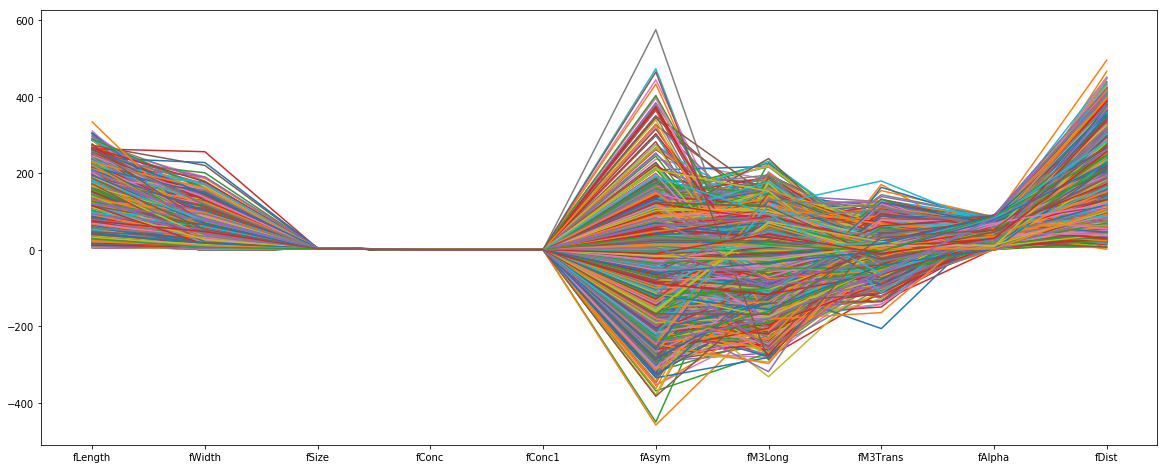

In [16]:
plt.figure(figsize=(20,8));
plt.plot(df.drop(["class"],axis = 1).T);


MinMaxScaler(copy=True, feature_range=(0, 1))


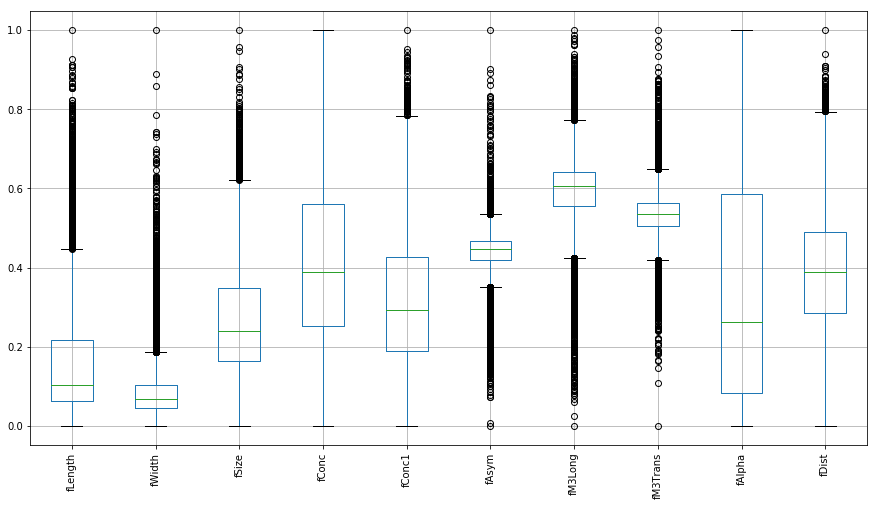

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(df.drop('class',axis = 1)))

#print(scaler.data_max_)

new_minimax_data = scaler.transform(df.drop('class',axis = 1))
new_minimax_data = pd.DataFrame(data = new_minimax_data, columns=df.columns[:-1])
new_minimax_data.boxplot(rot=90, figsize=(15,8));

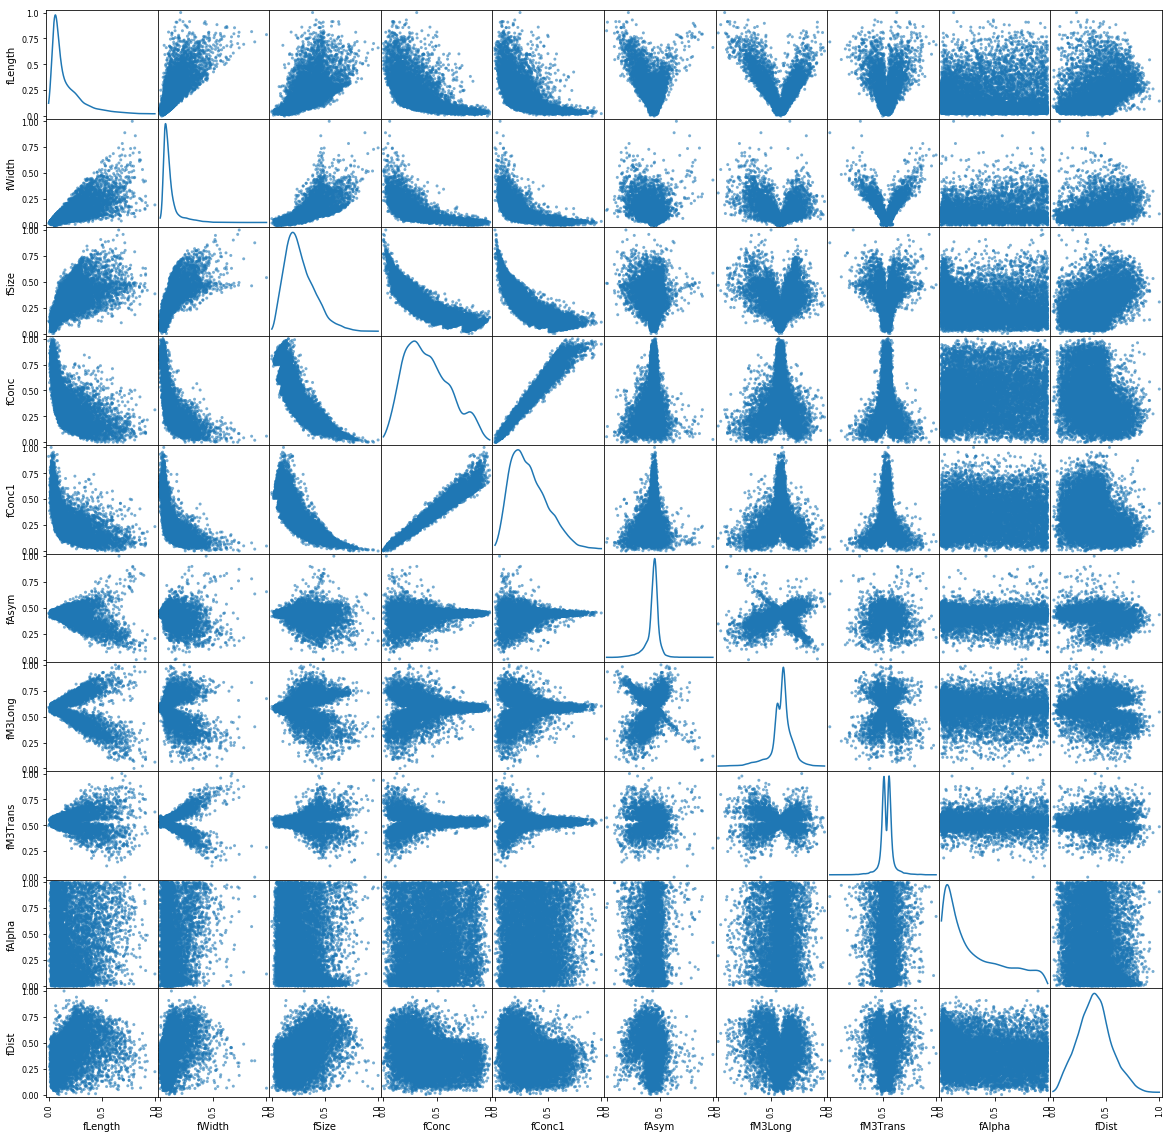

In [18]:
pd.plotting.scatter_matrix(new_minimax_data, alpha = .6, figsize = (20,20), diagonal = 'kde');

In [115]:
import seaborn as sns;

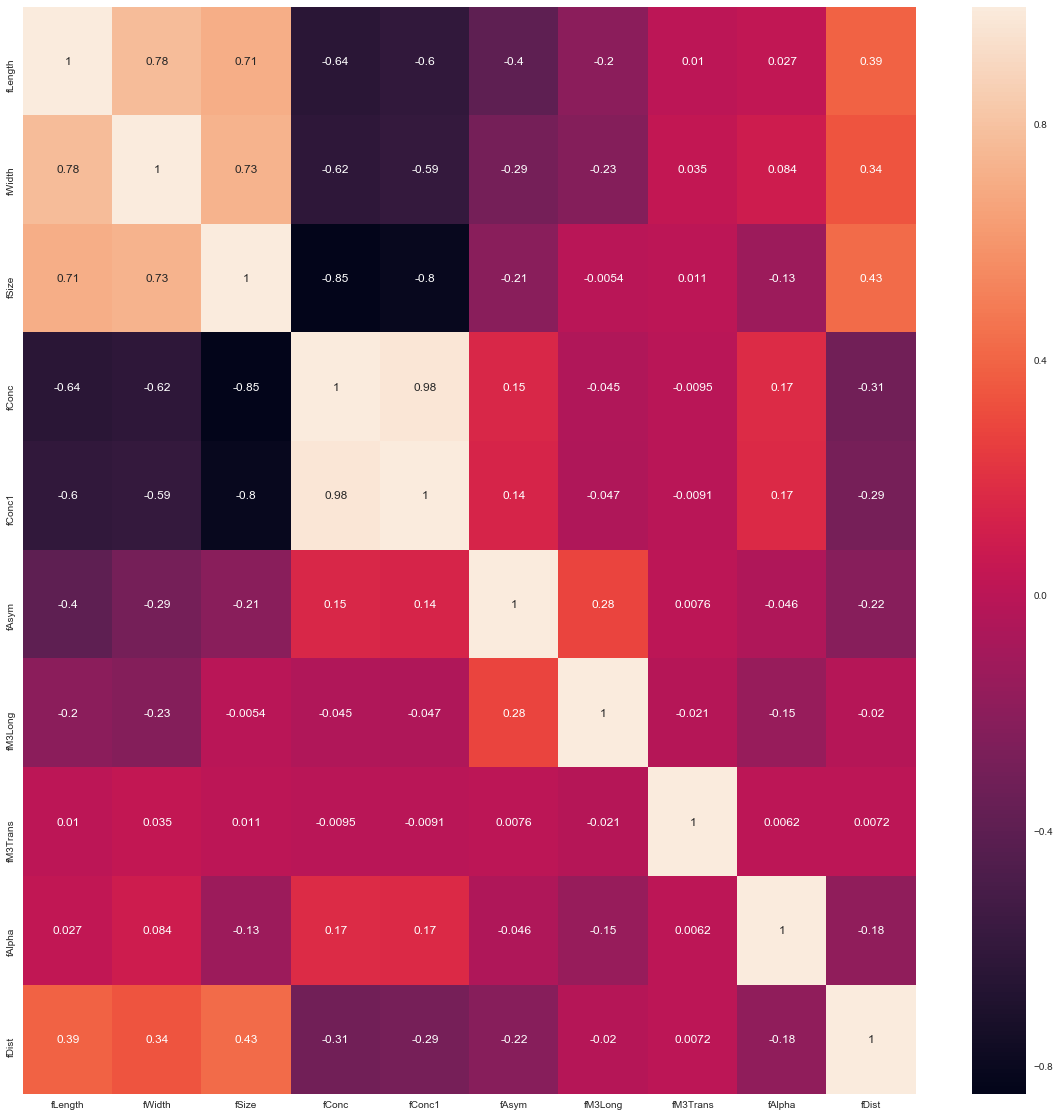

In [112]:
sns.set()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
correlation = new_minimax_data.corr(method='pearson')
ax = sns.heatmap(correlation,annot=True,ax = ax)

<Figure size 1440x576 with 0 Axes>

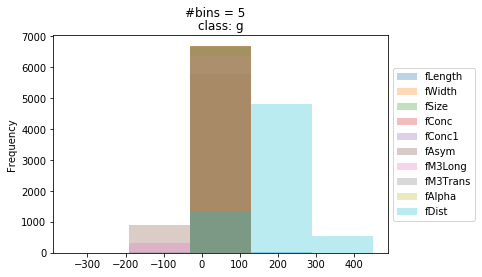

<Figure size 1440x576 with 0 Axes>

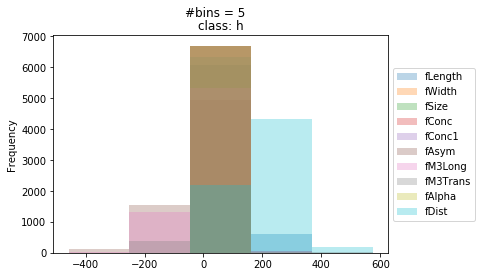

<Figure size 1440x576 with 0 Axes>

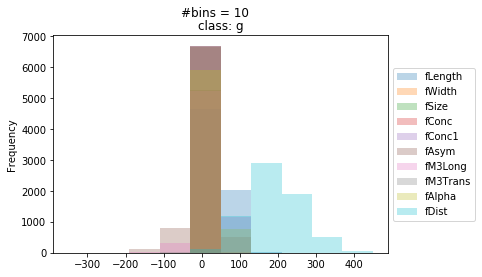

<Figure size 1440x576 with 0 Axes>

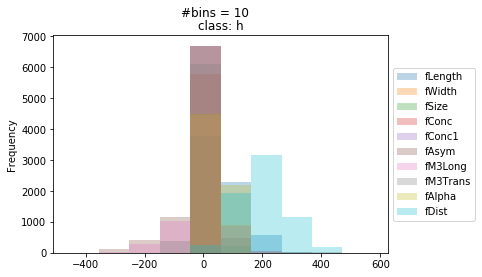

<Figure size 1440x576 with 0 Axes>

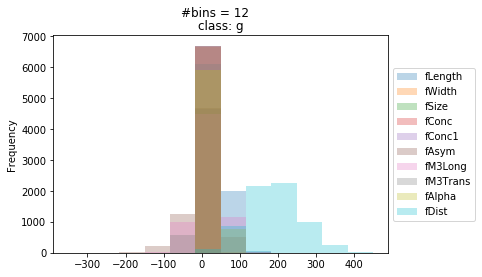

<Figure size 1440x576 with 0 Axes>

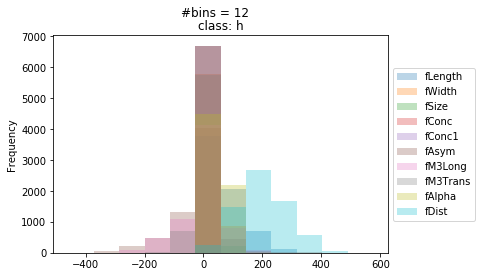

In [19]:
classes = df['class'].unique()
for bins in [5,10,12]:
    for i in range(classes.shape[0]):
        plt.figure(figsize=(20,8));
        df[df['class'] == classes[i]].drop('class',axis=1).plot.hist(alpha=0.3,bins = bins);
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
        plt.title("class: " + classes[i]);
        plt.suptitle("#bins = {}".format(bins));

# Part3: Pre_Tunning Training

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
def split_train_test(data,labels):
    X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.3)
    print (X_train.shape, y_train.shape)
    print (X_test.shape, y_test.shape)
    return [X_train, X_test, y_train, y_test]

In [22]:
X_train, X_test, y_train, y_test = split_train_test(new_minimax_data,df['class'])

(9363, 10) (9363,)
(4013, 10) (4013,)


In [23]:
y_train.head()  #make sure it's been shuffled

9041     h
5717     g
3351     g
12826    h
11751    h
Name: class, dtype: object

In [24]:
# encoding labels to numeric values
def tran_mathscore(x): 
    if x == 'g': 
        return 1 
    if x == 'h': 
        return 0 
    
y_train = y_train.apply(tran_mathscore)

y_test = y_test.apply(tran_mathscore)
y_train.head()

9041     0
5717     1
3351     1
12826    0
11751    0
Name: class, dtype: int64

In [76]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score,precision_score,recall_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test,beta): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    trainingSamples = int(len(y_train))
    testSamples = int(len(y_test))

    # Fit the learner to the training data using .fit(training_features, training_labels)
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] =  end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the training set(X_train)
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] =  end - start
            
    # Compute accuracy of the training (by comparing training prediction with ytrain true labels)
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train,predictions_train ,beta = beta, average='binary')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta = beta ,average='binary')
    
    results['recall'] = recall_score(y_test,predictions_test ,average='binary')
    results['precision'] = precision_score(y_test,predictions_test ,average='binary')
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, trainingSamples))
    print("{} tested on {} samples.".format(learner.__class__.__name__, testSamples))
    print("Training Accuracy = {}".format(results['acc_train']))
    print("Testing Accuracy = {}".format(results['acc_test']))
    print("Fscore Training = {}".format(results['f_train']))
    print("Fscore Testing = {}".format(results['f_test']))
    print("Precision Testing = {}".format(results['precision']))
    print("Recall Testing = {}".format(results['recall']))
    
    print("")
    
    
    # Return the results
    return results

In [77]:
#Importing supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import visuals as vs

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = AdaBoostClassifier(random_state=0)
clf_C = SVC(random_state=0,probability=True)
clf_D = RandomForestClassifier(random_state=0)
clf_E = KNeighborsClassifier()
clf_F = GaussianNB()

In [78]:
def pre_tuning_evaluation(X_train, y_train, X_test, y_test,beta):
    # Collect results on the learners
    results = {}
    for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        results[clf_name][i] = \
        results = train_predict(clf, X_train, y_train, X_test, y_test,beta)

    # Run metrics visualization for the three supervised learning models chosen
    #vs.evaluate(results, accuracy, fscore)

In [114]:
beta = 1
pre_tuning_evaluation(X_train, y_train, X_test, y_test,beta)

DecisionTreeClassifier trained on 9363 samples.
DecisionTreeClassifier tested on 4013 samples.
Training Accuracy = 1.0
Testing Accuracy = 0.7896835285322701
Fscore Training = 1.0
Fscore Testing = 0.7866531850353893
Precision Testing = 0.7807325639739087
Recall Testing = 0.7926642893530311

AdaBoostClassifier trained on 9363 samples.
AdaBoostClassifier tested on 4013 samples.
Training Accuracy = 0.8230268076471217
Testing Accuracy = 0.8198355345128333
Fscore Training = 0.8263284770988366
Fscore Testing = 0.8173781257893407
Precision Testing = 0.8106212424849699
Recall Testing = 0.8242485990830362

SVC trained on 9363 samples.
SVC tested on 4013 samples.
Training Accuracy = 0.7819075082772615
Testing Accuracy = 0.78320458509843
Fscore Training = 0.7930685042561817
Fscore Testing = 0.7908653846153846
Precision Testing = 0.7487482931269913
Recall Testing = 0.8380030565461029

RandomForestClassifier trained on 9363 samples.
RandomForestClassifier tested on 4013 samples.
Training Accuracy = 

# Part 4: Tuning Hyperparameters

In [80]:
def model_Parameter_Tuning (clf, parameters,X_train, y_train,X_test,y_test,beta):
    # TODO: Make an fbeta_score scoring object using make_scorer()
    scorer = make_scorer(fbeta_score, beta=beta)

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(clf, parameters,scoring=scorer,n_jobs= -1)

    # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized {}\n------".format(clf.__class__.__name__))
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = beta)))
    print("\nOptimized {}\n------".format(clf.__class__.__name__))
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = beta)))
    print("Best Parameters : {}".format(grid_fit.best_params_))
    evaluate_param(grid_fit, parameters, 1)
    print("-----------------------------------------------------")
    return best_clf

In [81]:
def evaluate_param(grid_search, parameters, index):    
    for parameter, param_range in dict.items(parameters):
        df = {}
        for i, score in enumerate(grid_search.grid_scores_):
            df[score[0][parameter]] = score[1]

        df = pd.DataFrame.from_dict(df, orient='index')
        df.reset_index(level=0, inplace=True)
        df = df.sort_values(by='index')

        plt.subplot(1,1,index)
        plot = plt.plot(df['index'], df[0])
        plt.title(parameter)
        plt.show()

In [82]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [34]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import svm, grid_search, datasets
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
parameters = []
parameters.append({"n_estimators": np.arange(75, 675, 75)})
parameters.append({'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10,100,1000,2000]})
parameters.append({"n_estimators": np.arange(75, 675, 75)})
parameters.append(dict(n_neighbors= list(np.arange(3, 33,3))))

In [83]:
def post_tuning_evaluation(X_train, y_train,X_test,y_test,beta):
    bestEstimators = []
    index = 0
    for clf in [clf_B, clf_C, clf_D, clf_E]:
        bestEstimators.append(model_Parameter_Tuning(clf, parameters[index],X_train, y_train,X_test,y_test,beta))
        index+=1
    return bestEstimators

Unoptimized AdaBoostClassifier
------
Accuracy score on testing data: 0.8198
F-score on testing data: 0.8174

Optimized AdaBoostClassifier
------
Final accuracy score on the testing data: 0.8286
Final F-score on the testing data: 0.8271
Best Parameters : {'n_estimators': 450}


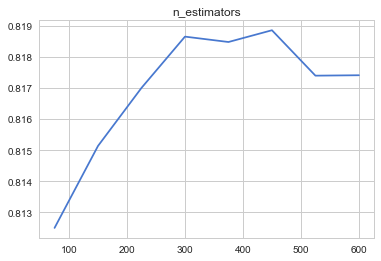

-----------------------------------------------------
Unoptimized SVC
------
Accuracy score on testing data: 0.7832
F-score on testing data: 0.7909

Optimized SVC
------
Final accuracy score on the testing data: 0.8348
Final F-score on the testing data: 0.8414
Best Parameters : {'C': 1000, 'kernel': 'rbf'}


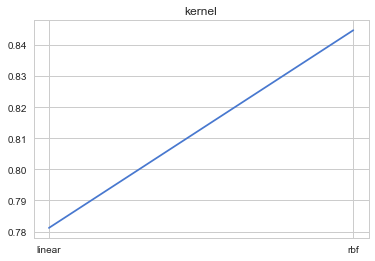

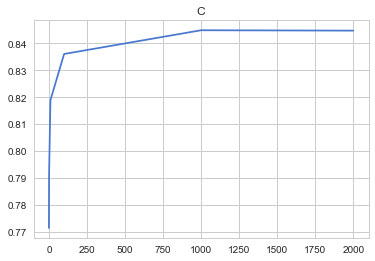

-----------------------------------------------------
Unoptimized RandomForestClassifier
------
Accuracy score on testing data: 0.8418
F-score on testing data: 0.8371

Optimized RandomForestClassifier
------
Final accuracy score on the testing data: 0.8664
Final F-score on the testing data: 0.8676
Best Parameters : {'n_estimators': 375}


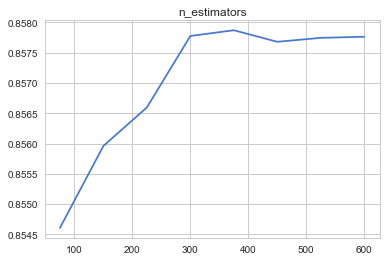

-----------------------------------------------------
Unoptimized KNeighborsClassifier
------
Accuracy score on testing data: 0.8119
F-score on testing data: 0.8197

Optimized KNeighborsClassifier
------
Final accuracy score on the testing data: 0.8161
Final F-score on the testing data: 0.8263
Best Parameters : {'n_neighbors': 9}


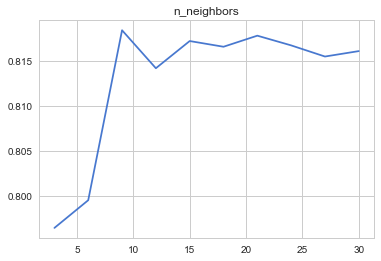

-----------------------------------------------------


In [122]:
beta = 1
best_estimators = post_tuning_evaluation(X_train, y_train,X_test,y_test,beta)

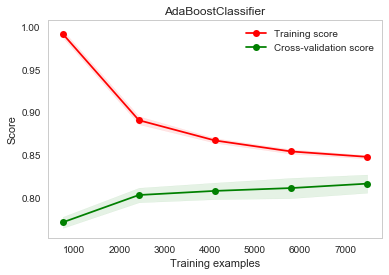

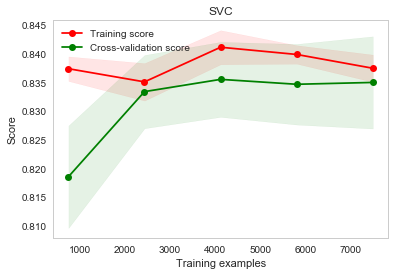

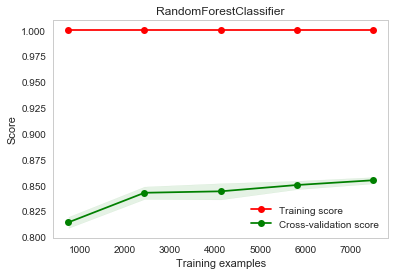

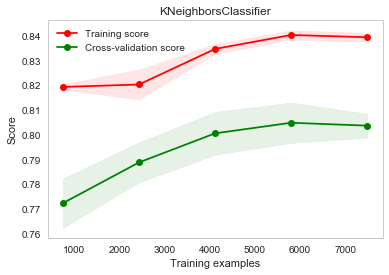

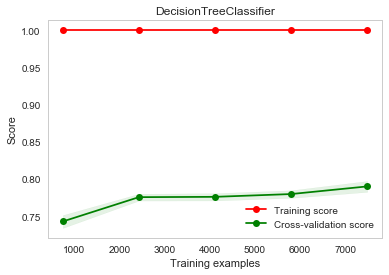

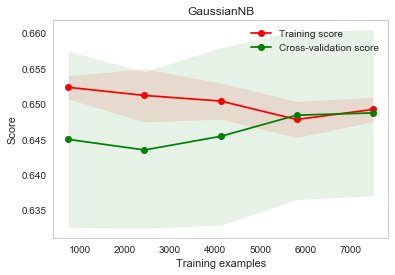

In [123]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
best_estimators.append(clf_A)
best_estimators.append(clf_F)

for bestEstimator in best_estimators:
    g = plot_learning_curve(bestEstimator,bestEstimator.__class__.__name__,X_train,y_train,cv=5)

# Part 6 : Trying Adaboost with Random Forest as the base classifier
* since both are the highest estimators

Unoptimized AdaBoostClassifier
------
Accuracy score on testing data: 0.8522
F-score on testing data: 0.8546

Optimized AdaBoostClassifier
------
Final accuracy score on the testing data: 0.8664
Final F-score on the testing data: 0.8673
Best Parameters : {'n_estimators': 450}


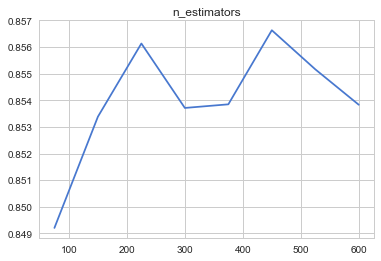

-----------------------------------------------------


In [127]:
clf_ADARF = AdaBoostClassifier(RandomForestClassifier(n_estimators = 10))
params = {"n_estimators": np.arange(75, 675, 75)}
beta = 1
model_Parameter_Tuning (clf_ADARF, params,X_train, y_train,X_test,y_test,beta);

# Part 7 : Using Max Voting for all used Estimators(Dicision Trees, NBGaussian and all best Estimators)
* for hard voting : means max voting is used
* soft voting : means weighted propability voting
* the following matrix shows correlation between all estimators(used to expect whether the voting would work or not)

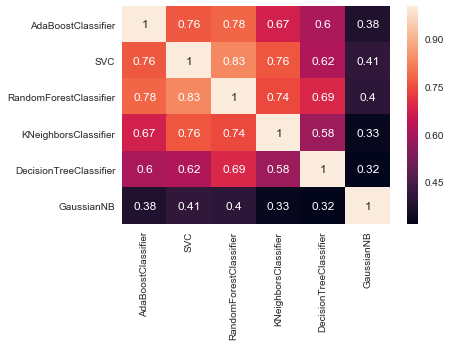

In [135]:
# Concatenate all classifier results
ensemble_results = pd.concat([pd.Series(bestEstimator.predict(X_test), name = bestEstimator.__class__.__name__) for bestEstimator in best_estimators],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [85]:
def ensemble_voting_evaluation(best_estimators,beta,voting = 'hard',weights = None):
    votingC = VotingClassifier(estimators=[(bestEstimator.__class__.__name__,bestEstimator) for bestEstimator in best_estimators] , voting=voting,weights = weights, n_jobs=-1)

    votingC = votingC.fit(X_train, y_train)
    predictions_test = votingC.predict(X_test)
    predictions_train = votingC.predict(X_train)
    results = []
    # Compute accuracy of the training (by comparing training prediction with ytrain true labels)
    acc_train = accuracy_score(y_train,predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    acc_test = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the training samples using fbeta_score()
    f_train = fbeta_score(y_train,predictions_train , average='binary', beta=beta)
        
    # TODO: Compute F-score on the test set which is y_test
    f_test = fbeta_score(y_test,predictions_test ,average='binary', beta=beta)
    print("Training Accuracy = {}".format(acc_train))
    print("Testing Accuracy = {}".format(acc_test))
    print("Fscore Training = {}".format(f_train))
    print("Fscore Testing = {}".format(f_test))
    return votingC

In [41]:
ensemble_voting_evaluation(best_estimators)
best_estimators_new = best_estimators[:len(best_estimators)-3]
best_estimators_new.pop(1)
beta = 1
clf = ensemble_voting_evaluation(best_estimators_new,beta)

Training Accuracy = 0.929296165758838
Testing Accuracy = 0.8597059556441565
Fscore Training = 0.9217385050089905
Fscore Testing = 0.8395540475036356
Training Accuracy = 0.9263056712592118
Testing Accuracy = 0.8464988786444057
Fscore Training = 0.998309755649458
Fscore Testing = 0.8679973790093306


In [42]:
ensemble_voting_evaluation(best_estimators,'soft',[4,4,6,2,2,1]);

Training Accuracy = 0.9768236676278971
Testing Accuracy = 0.8534762023423872
Fscore Training = 0.9638641340326933
Fscore Testing = 0.8171647747225934


# Part 8 : Swarm plot and Violin plots are used to determine class discriminative features
- for violin if median of both classes are far then the feature is important
- in swarm if plot points for both classes are divided so this feature is important

In [118]:

def swarm_plot_features(featureName):
    sns.set(style="whitegrid", palette="muted")
    data_dia = y_train[:300]
    data = X_train[:300]
    data = pd.concat([data_dia,data[featureName]],axis=1)
    data = pd.melt(data,id_vars="class",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x="features", y="value", hue="class", data=data);

    plt.xticks(rotation=90)


swarm plot time:  -0.01338210105895996  m


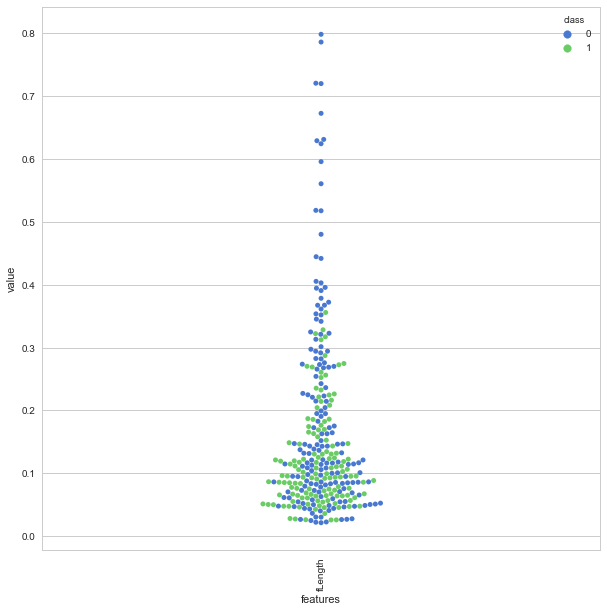

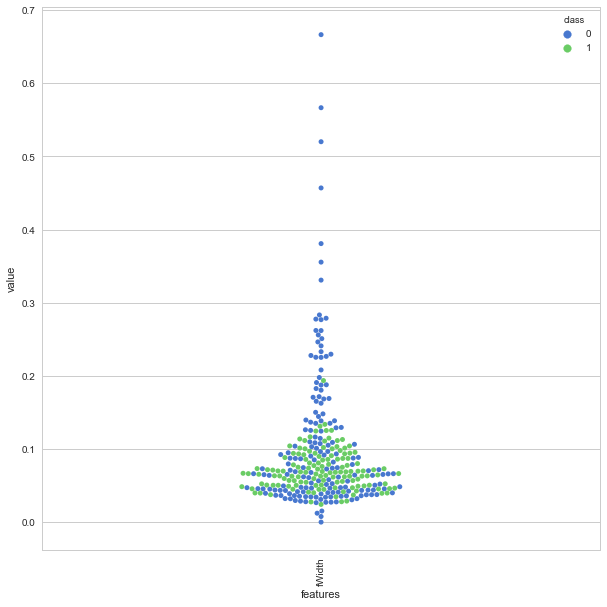

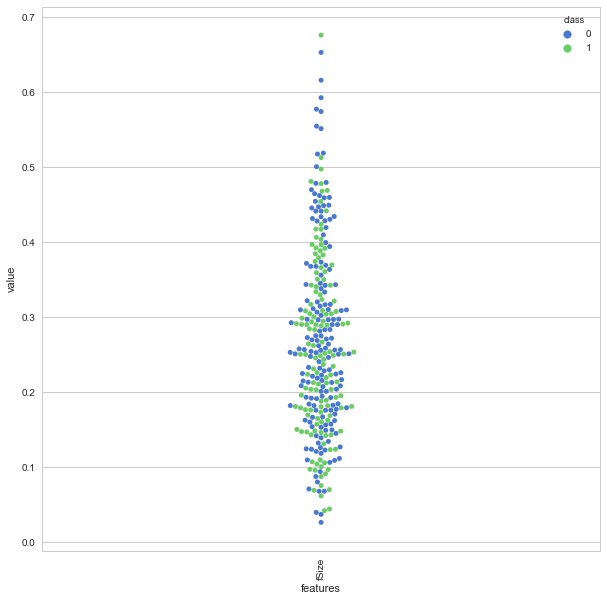

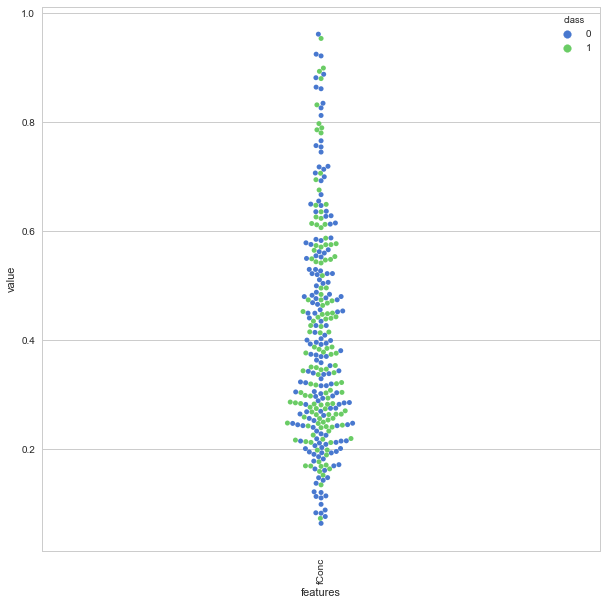

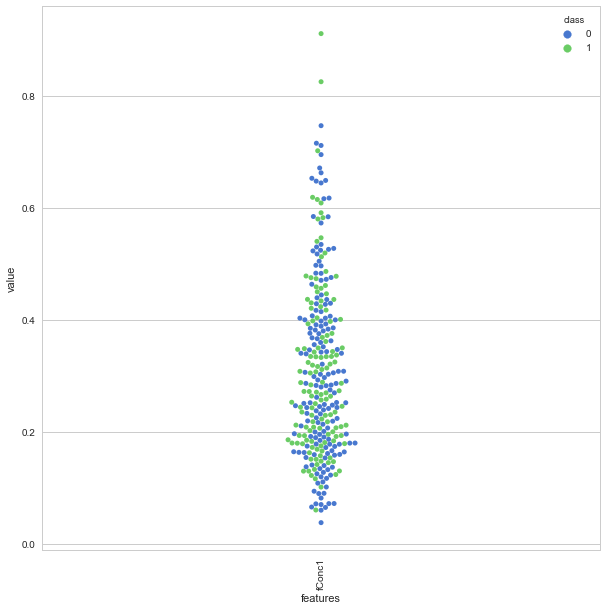

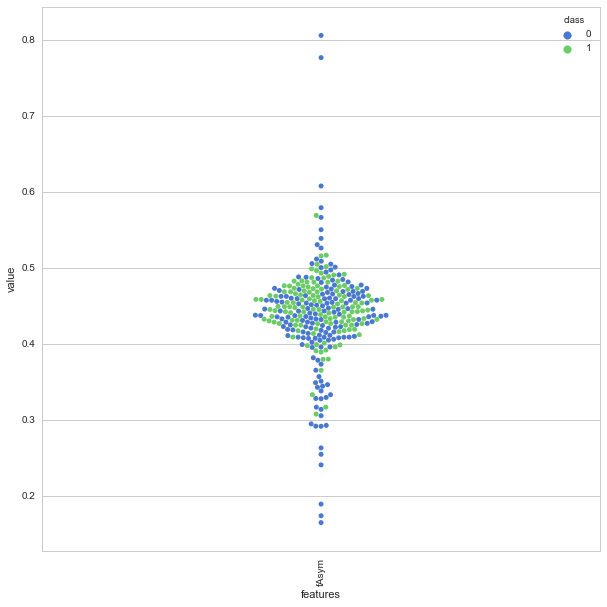

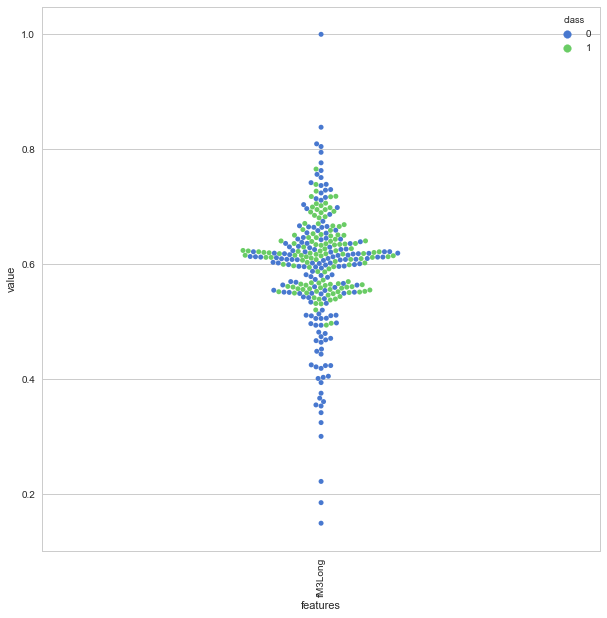

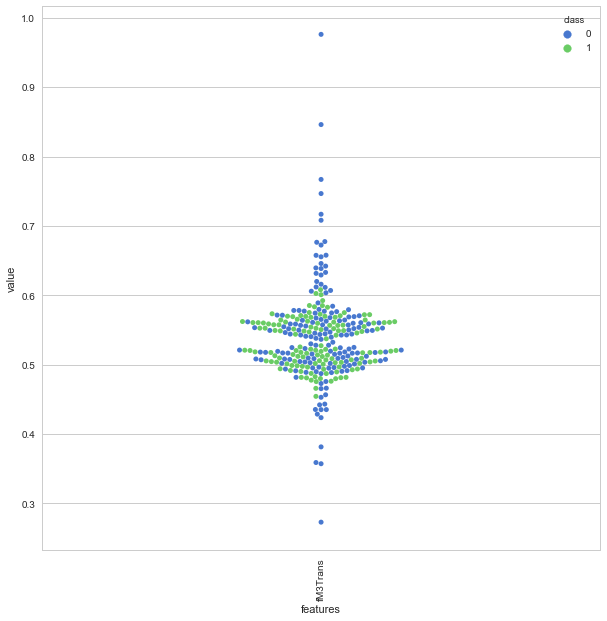

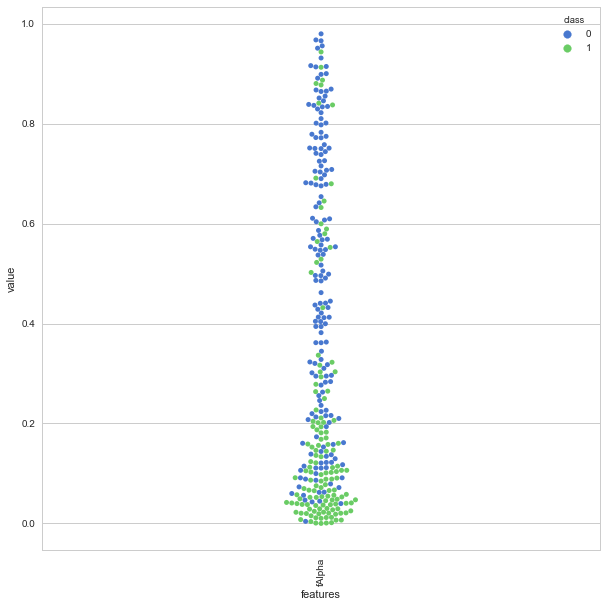

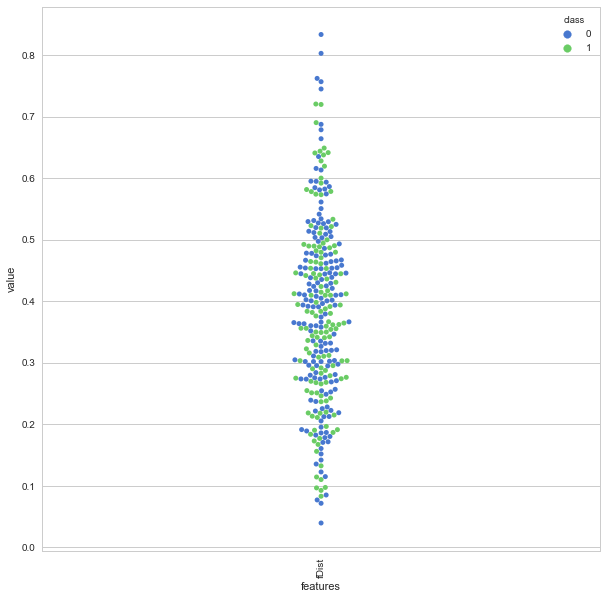

In [120]:
# useful plot but takes a looooot of time
import time
start = time.time()
for col in X_train.columns:
    swarm_plot_features(col)
end = time.time()
print("swarm plot time: ", (start-end)/60 ," m")


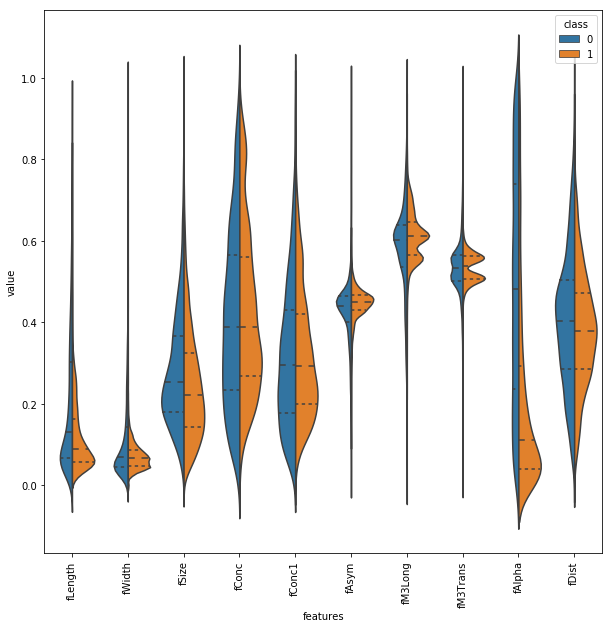

In [116]:
data_dia = y_train
data = X_train
data = pd.concat([data_dia,data],axis=1)
data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart");
plt.xticks(rotation=90);

# Part 9 : Feature Selection(we used 2 methods)
- First one is Recursive Feature Elimination with Cross Validation( Recursivly Choose Best Feature )
- Second one is KBest using Chi Square ( K = # features selected by RFECV)

In [44]:
from sklearn.feature_selection import RFECV # recursive 

scorer = make_scorer(fbeta_score, beta=0.1)

# The "accuracy" scoring is proportional to the number of correct classifications
clf_best = RandomForestClassifier(n_estimators = 300) 
rfecv = RFECV(estimator=clf_best, step=1, cv=5,scoring=scorer,n_jobs = -1,verbose = 1)   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 8
Best features : Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fM3Long', 'fAlpha',
       'fDist'],
      dtype='object')


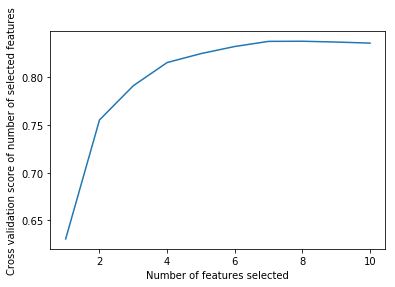

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score,confusion_matrix

# find best scored n features
select_feature = SelectKBest(chi2, k=rfecv.n_features_).fit(X_train, y_train)

In [47]:
#print('Score list:', select_feature.scores_[:rfecv.n_features_])
#print('Feature list:', X_train.columns[:rfecv.n_features_])
fs_score = pd.DataFrame(data= select_feature.scores_.T ,columns = ['Scores'],index = df.columns[:-1])
sorted = fs_score.sort_values(by=['Scores'],ascending=False)
sorted

Scores
fAlpha    503.211578
fLength   102.207628
fWidth     41.832127
fSize      13.074005
fM3Long     4.540905
fDist       2.528513
fAsym       2.409403
fConc       1.423415
fConc1      0.203203
fM3Trans    0.001247

Fbeta Score is:  0.851313091867617


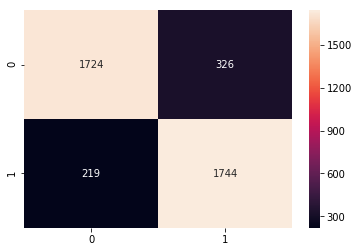

In [117]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(n_estimators = 300)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
FS_2 = fbeta_score(y_test,clf_rf_2.predict(x_test_2), average='binary', beta=0.5)
print('Fbeta Score is: ',FS_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

# Part 10 : Standrization but with outliers removing
- used z-score, remove outliers

In [48]:
df.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long fM3Trans  \
0  26.6585  15.5999  2.5237  0.4611   0.256  16.9138  16.2574  -9.0758   
1  95.9193  24.9227  3.3052  0.2273  0.1458 -26.8653   58.577 -14.2839   
2  20.4837  10.9382  2.2405  0.5977  0.3075   -6.962  17.8283  -7.6208   
3  12.8791  11.4268  2.0917  0.7368  0.3846  15.0953  -5.6954 -11.5668   
4  123.466  25.1281  3.2926  0.1575  0.0808  -145.14  48.5133 -20.9635   

    fAlpha    fDist class  
0    2.148  243.223     g  
1   7.4375  316.122     g  
2    45.65  110.864     g  
3  67.6544  256.531     g  
4  54.6896  253.158     g

In [49]:
from sklearn import preprocessing
from scipy import stats

In [50]:
#normalized_matrix = preprocessing.normalize(df.drop('class',axis = 1))
new_zscore_data = stats.zscore(df.drop(['class'],axis = 1).astype('float32'))
normalized_df = pd.DataFrame(data = new_zscore_data, columns=df.columns[:-1])
normalized_df.head()

fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0 -0.649461 -0.386125 -0.668197  0.440354  0.366273  0.372812  0.159037   
1  0.823133  0.060839  0.986726 -0.825254 -0.616673 -0.294336  0.910182   
2 -0.780747 -0.609621 -1.267909  1.179799  0.825635  0.008970  0.186919   
3 -0.942433 -0.586196 -1.583011  1.932776  1.513340  0.345100 -0.230611   
4  1.408819  0.070686  0.960044 -1.203096 -1.196451 -2.096720  0.731558   

   fM3Trans    fAlpha     fDist  
0 -0.404577 -1.090420  0.630575  
1 -0.629308 -0.894329  1.584793  
2 -0.341793  0.522272 -1.101951  
3 -0.512064  1.338012  0.804771  
4 -0.917535  0.857385  0.760620

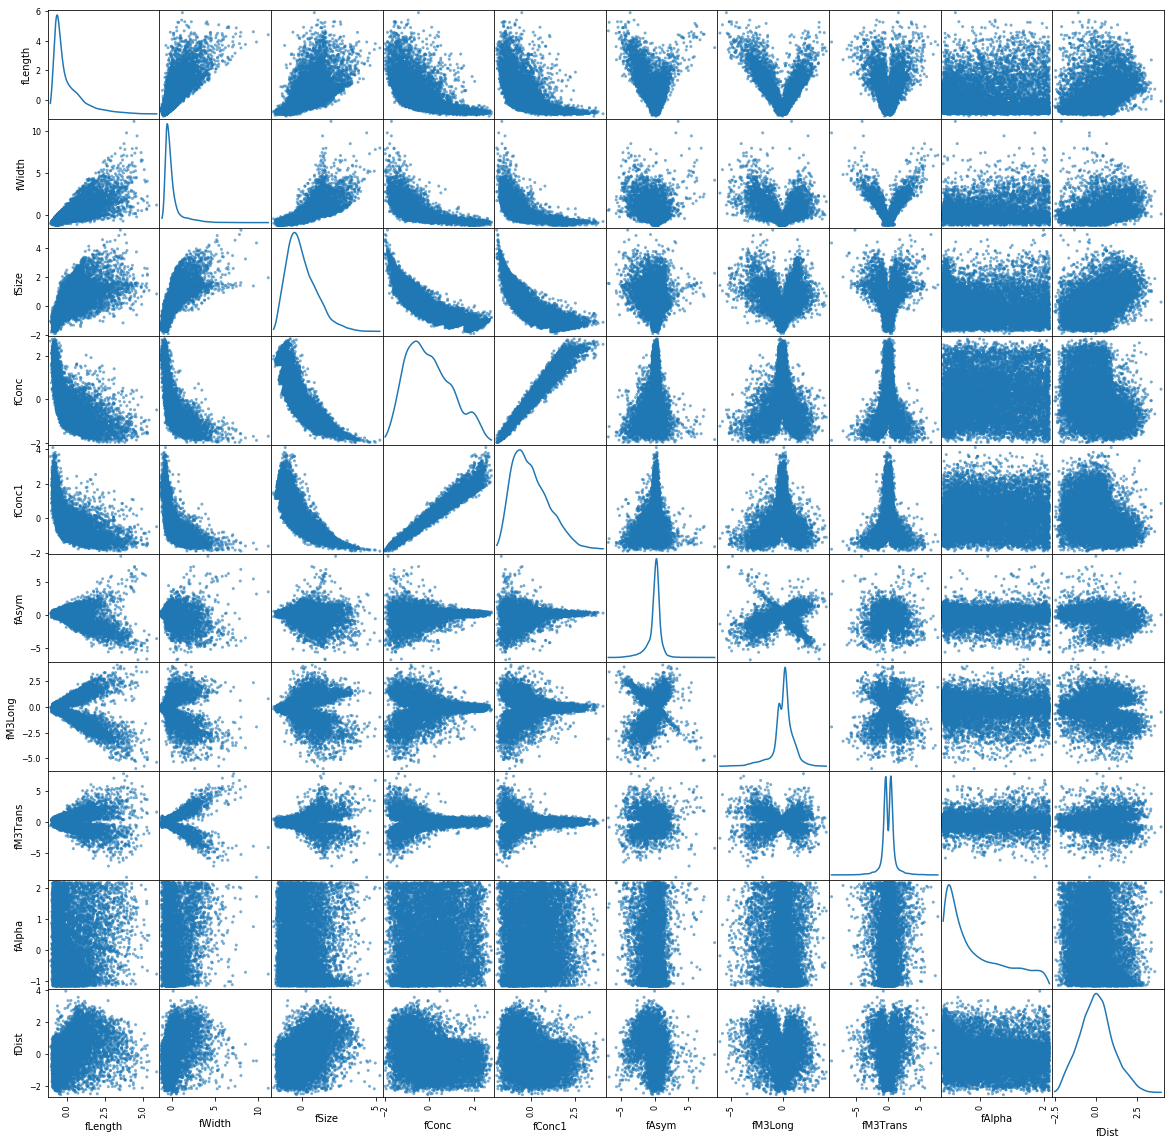

In [51]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(normalized_df, alpha = 0.6, figsize = (20,20), diagonal = 'kde');

In [52]:
# For each feature find the data points with extreme high or low values
seen = {}
dupes = []
for feature in normalized_df.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(normalized_df,25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(normalized_df,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outlier_list = (normalized_df[~((normalized_df[feature] >= Q1 - step) & (normalized_df[feature] <= Q3 + step))])
    display(outlier_list)
    indicies = outlier_list.index
    for index in indicies:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1


Data points considered outliers for the feature 'fLength':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
162    3.098349  0.663272  0.389132 -0.921068 -0.982379 -3.102020  1.388259   
2416   4.568226 -0.169216 -0.599163  0.410582  0.151309 -5.214872  3.488914   
3892   2.340247  0.827688  0.561719 -1.051527 -1.065332  2.882186  0.585655   
4076   3.670010 -0.677959 -1.155886  0.506396  0.466173 -2.375274 -3.383065   
4749   2.352493 -0.524095 -1.050005  0.497734  0.206611 -1.435928 -2.564590   
5259   3.044728 -0.596019 -0.710338  0.218413  0.081736 -1.891924 -3.659280   
6495   3.145083  7.320006  4.564240 -1.980433 -1.852045  0.244602 -1.534597   
6693   3.361844  2.117648  1.271335 -1.317857 -1.270484  4.665633 -1.817081   
6698   2.565921  1.701076  2.342853 -1.657265 -1.420334 -3.063301 -2.394979   
6711   2.438939  1.311433  0.953479 -0.544850 -0.409737 -1.503282 -4.201095   
6731   2.560984  1.544758  1.100654 -0.954089 -0.947592 -1.247063 -2.898668   
6732   2.994699  0.905711  1.815353 -0.953006 -0.954728 -3.446512 -2.414643   
6766   3.163000  1.828955  0.904774 -0.751635 -0.724601 -3.578256 -3.029296   
6769   3.198003  1.854829  1.401992 -1.434240 -1.381088 -1.770729 -2.595296   
6772   2.793363  1.703219  1.220088 -0.872349 -0.772767  0.708022 -2.579760   
6814   5.101061  4.188783  2.627038 -1.553331 -1.534506 -4.333472 -4.907758   
6816   2.790089  0.795374  0.650236 -1.469426 -1.415874 -1.964070 -2.653125   
6839   2.819100  2.871040  0.843151 -0.780325 -0.753144 -3.029955 -3.010719   
6854   4.221365  2.854245  2.586803 -1.694075 -1.578212 -3.299913 -2.919061   
6863   3.896339  5.294364  1.571614 -1.338968 -1.237481 -2.614906 -2.662513   
6865   3.309923  2.703081  1.548955 -1.102952 -1.125094 -2.593435 -1.941694   
6873   2.848154  1.406212  0.881268 -1.570112 -1.370384  5.670992 -2.964344   
6876   2.906540  1.322259  0.338945 -0.449578 -0.534612 -3.974523  2.648890   
6879   2.876166  3.488944  1.420416 -1.366575 -1.331137 -4.494130 -0.960260   
6883   3.658699  4.260281  1.440321 -1.266431 -1.198235 -3.877745 -2.519382   
6885   2.342196  4.784773  0.858822 -1.300534 -1.102794 -1.922906  1.553669   
6891   2.926518  7.001310  1.427192 -1.328683 -1.029653 -3.489236 -3.022886   
6892   3.167854  4.946969  1.383357 -1.181444 -1.175044 -1.905532  1.514762   
6896   4.353217  0.204380 -0.271566  0.028950  0.239614  3.721425  3.126209   
6909   2.701245  1.470014  1.982009 -1.335179 -1.183071 -3.535994  2.402073   
...         ...       ...       ...       ...       ...       ...       ...   
13095  2.887137  4.216557  0.946068 -1.111613 -1.111714 -2.608674 -2.623801   
13110  4.350646  5.864843  2.183819 -1.379026 -1.516666 -4.949405 -1.470527   
13134  2.338184  3.612426  1.798623 -1.223125 -1.116174 -2.572877 -2.357650   
13135  3.588599  1.858487  2.876706 -1.680542 -1.588024 -5.715274 -2.339208   
13149  3.543078  4.735636  1.690413 -1.456976 -1.423010  0.738025  2.577626   
13166  4.005454  5.420887  1.367898 -1.338427 -1.265132 -3.184935 -3.123960   
13191  2.708306  4.845186  2.019492 -1.458059 -1.348977  5.089078 -3.345880   
13195  2.280276  0.175974 -0.080768 -0.501544 -0.588130 -2.497952  1.804323   
13222  2.322321  2.132990  3.636509 -1.590682 -1.801203 -2.648749  1.561159   
13225  4.390480  4.481586  1.314958 -1.440195 -1.374844 -4.270285 -2.213081   
13230  3.221156  3.751365  3.465829 -1.758492 -1.662057 -4.200628 -2.427849   
13231  3.636346  6.576874  2.930917 -1.932256 -1.817259 -2.627885 -4.294472   
13242  2.415470  1.884789  1.458533 -1.378484 -1.344517 -0.053211 -1.001186   
13256  3.080492 -0.123042 -0.227096 -0.192991 -0.459687 -3.639933  2.012491   
13258  2.837831  2.446969  1.420627 -0.899957 -0.904778  3.302812  2.592323   
13280  3.369022  5.968300  3.410982 -1.807211 -1.835098 -3.053120 -2.620830   
13291  2.478638  1.350147  0.756964 -0.486387 -0.224208 -2.185914 -2.539048   
13293  2.333362  2.883419  0.904774 -1.083465 -1.026977 -1.166988 -2.190778   
13298  2.308437  3.000059  2.310665 -1.314067 -1.497043 -1

Data points considered outliers for the feature 'fWidth':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
479    1.424213  3.277184  3.896130 -1.878665 -1.768201  2.071488  1.536063   
890    0.746976  2.571007  2.656261 -1.570112 -1.454229  1.037387  1.687302   
1242   2.229219  5.387710  2.587651 -1.853223 -1.750361  1.894076 -1.280708   
2055   1.020817  2.374134  2.843883 -1.665926 -1.571076  1.475155  1.617763   
2342   1.406608  4.301128  4.148128 -1.887326 -1.769984  1.137545  1.549247   
3203   1.180449  2.838650  3.791096 -1.840773 -1.736090  0.161323  1.345263   
6495   3.145083  7.320006  4.564240 -1.980433 -1.852045  0.244602 -1.534597   
6565   1.613717  3.079496  3.091645 -1.754161 -1.658489  1.850370  1.796815   
6694   2.187036  3.039152  2.464404 -1.546835 -1.464040 -0.371422 -3.134173   
6699   0.884619  2.508758  2.073491 -1.238824 -1.213398 -0.341201 -1.706835   
6714   1.905128  2.489519  0.899692 -1.575525 -1.480096  1.740462  2.396164   
6720   1.654019  3.461785  0.979526 -0.811180 -1.064440  2.360353 -1.713838   
6776   2.078140  5.094676  1.810694 -1.537633 -1.300811 -1.207410 -1.522717   
6814   5.101061  4.188783  2.627038 -1.553331 -1.534506 -4.333472 -4.907758   
6839   2.819100  2.871040  0.843151 -0.780325 -0.753144 -3.029955 -3.010719   
6854   4.221365  2.854245  2.586803 -1.694075 -1.578212 -3.299913 -2.919061   
6857   1.760784  3.916481  3.324160 -1.808293 -1.699519 -1.517655 -1.999131   
6863   3.896339  5.294364  1.571614 -1.338968 -1.237481 -2.614906 -2.662513   
6865   3.309923  2.703081  1.548955 -1.102952 -1.125094 -2.593435 -1.941694   
6875   1.121599  2.258913  1.346722 -1.275092 -1.410522  1.378683  0.884790   
6879   2.876166  3.488944  1.420416 -1.366575 -1.331137 -4.494130 -0.960260   
6883   3.658699  4.260281  1.440321 -1.266431 -1.198235 -3.877745 -2.519382   
6885   2.342196  4.784773  0.858822 -1.300534 -1.102794 -1.922906  1.553669   
6889   1.786361  3.061584  3.832813 -1.858095 -1.733414  1.285046 -2.285321   
6891   2.926518  7.001310  1.427192 -1.328683 -1.029653 -3.489236 -3.022886   
6892   3.167854  4.946969  1.383357 -1.181444 -1.175044 -1.905532  1.514762   
6899   1.548827  2.407790  0.445038 -0.688300 -0.575643 -1.182087 -2.142066   
6903   1.440839  4.345428  1.620743 -1.648062 -1.565724  2.731716  1.991171   
6919   2.285122  3.942159  3.222302 -1.586893 -1.691492  0.621948  1.475509   
6921   4.281487  6.271482  1.429945 -1.743876 -1.506855  5.924919 -3.344632   
...         ...       ...       ...       ...       ...       ...       ...   
13065  3.020283  2.562354  0.933362 -1.164663 -0.940457 -3.783246  2.524323   
13066  2.706733  6.625311  2.283348 -1.375778 -1.340949 -1.518325 -2.708820   
13093  2.098783  3.791637  0.421320 -1.068849 -0.968108 -3.143667 -1.637786   
13095  2.887137  4.216557  0.946068 -1.111613 -1.111714 -2.608674 -2.623801   
13110  4.350646  5.864843  2.183819 -1.379026 -1.516666 -4.949405 -1.470527   
13117  1.292795  2.601595  0.835528 -0.248206 -0.123416 -0.369784 -2.906495   
13120  1.047160  2.870019  2.507393 -1.459683 -1.406063 -1.451244 -1.440060   
13134  2.338184  3.612426  1.798623 -1.223125 -1.116174 -2.572877 -2.357650   
13149  3.543078  4.735636  1.690413 -1.456976 -1.423010  0.738025  2.577626   
13159  2.189374  2.687111  2.448946 -1.371989 -1.332030 -1.108608 -2.972505   
13166  4.005454  5.420887  1.367898 -1.338427 -1.265132 -3.184935 -3.123960   
13191  2.708306  4.845186  2.019492 -1.458059 -1.348977  5.089078 -3.345880   
13206  1.562211  3.453068  3.217432 -1.801256 -1.526478  0.042660 -3.323646   
13208  1.010696  3.435756  1.792482 -1.656182 -1.570184  1.157183 -1.198988   
13225  4.390480  4.481586  1.314958 -1.440195 -1.374844 -4.270285 -2.213081   
13230  3.221156  3.751365  3.465829 -1.758492 -1.662057 -4.200628 -2.427849   
13231  3.636346  6.576874  2.930917 -1.932256 -1.817259 -2.627885 -4.294472   
13244  1.587374  2.596566  0.740446 -0.244417 -0.089522 -0.616261 -3.259352   
13258  2.837831  2.446969  1.420627 -0.899957 -0.904778  3

Data points considered outliers for the feature 'fSize':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
125    0.802350  1.019168  2.456146 -1.470509 -1.383763  1.729800  1.252192   
144    0.620901  1.073612  2.545933 -1.504612 -1.463148  0.797571  1.596588   
195    0.514683  0.671317  2.440052 -1.461306 -1.407847  1.362249  1.163881   
256    0.970597  0.660870  2.786284 -1.539798 -1.482772  1.847277  1.389416   
391    0.614127  0.992746  2.836259 -1.536009 -1.470284  0.012234  1.407460   
452    0.558481  0.602715  2.382876 -1.404468 -1.370384  0.562053  1.305309   
479    1.424213  3.277184  3.896130 -1.878665 -1.768201  2.071488  1.536063   
518    0.834529  0.489128  2.467369 -1.458059 -1.423902  1.200343  1.264557   
584    1.036571  2.064413  3.230773 -1.684331 -1.609431  1.578064  1.111935   
658    1.017138  1.369133  3.042516 -1.613418 -1.536289  0.932285  1.171420   
662    0.886380  1.048207  2.267889 -1.327600 -1.313298  0.550784  0.854754   
678    0.568934  0.481573  2.436452 -1.396348 -1.361464  1.125582  1.345196   
696    1.108882  0.964005  3.063692 -1.658889 -1.579996  1.594888  1.393119   
782    0.452669  0.523504  2.457628 -1.512191 -1.467608  1.357359  1.128407   
854    0.921653  1.989837  3.197526 -1.694616 -1.610323 -1.199010  1.182005   
890    0.746976  2.571007  2.656261 -1.570112 -1.454229  1.037387  1.687302   
899    0.604321  0.537561  2.346241 -1.330307 -1.313298  0.367860  1.183951   
964    1.063765  1.942239  3.342795 -1.721141 -1.637974  0.414878  1.303792   
1039   0.387415  0.473211  2.311300 -1.346547 -1.308838  0.352256  1.123085   
1087   0.490555  0.894799  2.395370 -1.478629 -1.407847  1.001894  1.437881   
1102   0.504345  0.709019  2.463558 -1.461848 -1.398927  1.415062  1.243884   
1204   0.946103  0.762073  2.343064 -1.264266 -1.230345 -2.290743  1.120237   
1242   2.229219  5.387710  2.587651 -1.853223 -1.750361  1.894076 -1.280708   
1247   0.985352  1.137616  2.870777 -1.559827 -1.503287 -2.019428  1.236747   
1248   0.910703  1.617550  2.966493 -1.573901 -1.488123 -0.889802  1.061431   
1262   0.970533  0.813842  2.606286 -1.507319 -1.464040 -1.184885  1.382056   
1271   1.003276  0.475676  2.399393 -1.388228 -1.261564 -0.436481  1.151112   
1295   0.775337  0.537436  2.682096 -1.499740 -1.390007  0.963604  1.407668   
1415   1.125572  1.091327  3.068986 -1.729261 -1.648677  0.259849  1.541466   
1416   0.899043  1.038815  2.735883 -1.528972 -1.441741 -0.332226  1.372354   
...         ...       ...       ...       ...       ...       ...       ...   
12686  4.025535  1.632177  2.287583 -1.179278 -1.125986 -2.625201 -4.505457   
12803  1.409748  2.300704  3.284772 -1.740628 -1.627270 -2.061665  1.256355   
12818  1.371250  2.880748  2.569438 -1.620455 -1.529154  1.293456  1.634844   
12832  2.717363  3.803336  3.583146 -1.773649 -1.669192 -3.173201 -2.576801   
12847  2.662997  3.805205  2.479228 -1.748748 -1.661165 -1.634386 -3.697352   
12872  1.871469  2.845194  2.925200 -1.615042 -1.391791 -3.392641 -2.152073   
12878  3.202489  2.408816  3.455664 -1.848351 -1.739658 -2.187149 -3.012423   
12905  1.354436  4.088534  2.476899 -1.328142 -1.363248  0.340370 -0.877177   
12932  1.351392  2.325779  2.864847 -1.606381 -1.534506 -0.370839  1.041449   
12942  3.993958  1.587274  2.726354 -1.657265 -1.571076 -3.502810 -3.504153   
12957  2.365314  6.306442  2.601202 -1.642108 -1.571968  0.238882 -2.491391   
12988  1.289801  1.278909  2.533439 -1.597719 -1.408738 -0.489358 -2.846903   
13023  1.319418  3.120943  2.883058 -1.585269 -1.566616 -2.099134  1.450951   
13037  1.657969  3.385924  2.908047 -1.625868 -1.621026  0.073810  1.421992   
13049  3.576316  1.620891  2.347723 -1.524641 -1.538965 -2.433532 -2.803817   
13056  1.218970  3.180416  3.083598 -1.394724 -1.482772 -1.962125 -0.924483   
13066  2.706733  6.625311  2.283348 -1.375778 -1.340949 -1.518325 -2.708820   
13120  1.047160  2.870019  2.507393 -1.459683 -1.406063 -1.451244 -1.440060   
13135  3.588599  1.858487  2.876706 -1.680542 -1.588024 -5

Data points considered outliers for the feature 'fConc':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
220   -0.936565 -0.698776 -0.889701  2.542845  3.265160 -0.051032 -0.309958   
309   -0.813650 -0.797112 -1.146569  2.443784  1.789850  0.423089  0.091100   
317   -0.934048 -0.645669 -1.313861  2.294379  2.474879 -0.083666 -0.252924   
335   -0.957023 -0.724622 -1.114805  2.527688  4.094688  0.244151  0.067053   
407   -0.450308 -1.021816 -0.845231  2.463271  2.890535  0.270659  0.213495   
426   -0.743221 -1.134031 -1.234027  2.382614  1.961999 -0.225598 -0.431390   
589   -0.719756 -0.851172 -1.209038  2.321445  1.809473  0.500480  0.024600   
781   -0.931803 -0.658767 -1.270450  2.374495  2.530181 -0.081704 -0.266379   
801   -0.852854 -0.789153 -1.174945  2.528230  3.017194  0.047031 -0.220426   
806   -0.738920 -0.846747 -1.218991  2.251073  2.627405 -0.193952 -0.430358   
876   -0.931868 -0.644264 -1.275744  2.306288  2.245644  0.322830 -0.017060   
940   -0.795435 -0.797740 -1.297344  2.281387  1.920968  0.426193  0.113073   
1059  -0.925936 -0.665882 -1.128357  2.435122  1.937024 -0.107250 -0.214862   
1086  -0.750224 -1.134031 -1.432236  2.260276  2.036924  0.115063 -0.129521   
1110  -0.927933 -0.655473 -1.325084  2.380990  1.983406  0.334124 -0.034912   
1313  -0.653861 -1.134027 -1.259862  2.262441  2.275971  0.115062 -0.129523   
1327  -0.844517 -0.784018 -1.128357  2.435122  2.861992  0.174581 -0.196356   
1446  -0.932664 -0.639925 -1.058264  2.279763  2.226021 -0.093302 -0.236777   
1507  -0.931024 -0.646796 -1.377178  2.324151  2.210857 -0.094180 -0.241885   
1579  -0.936125 -0.673711 -1.170074  2.420507  2.992219 -0.062326 -0.290648   
1753  -0.927233 -0.656878 -1.199086  2.390193  1.769334 -0.112608 -0.173453   
1812  -0.833631 -0.812180 -0.932689  2.677093  2.017301 -0.029021  0.076877   
1834  -0.852658 -0.778951 -1.275744  2.306288  3.124230  0.092446 -0.204014   
1969  -0.798645 -1.134031 -1.353672  2.247825  3.175964  0.106411 -0.035988   
2007  -0.932383 -0.666026 -1.270450  2.405891  2.684491  0.305564  0.017940   
2022  -0.942185 -0.672416 -1.297344  2.345804  3.243753  0.281669  0.032479   
2166  -0.838317 -0.779329 -1.110358  2.321986  2.769228  0.070884 -0.040665   
2218  -0.925558 -0.687341 -0.977794  2.529312  2.477555  0.316358  0.013224   
2238  -0.919722 -0.710972 -1.045770  2.636494  2.169827  0.333406 -0.021928   
2280  -0.799430 -0.798118 -1.203956  2.327399  1.932564  0.422956  0.111703   
...         ...       ...       ...       ...       ...       ...       ...   
11139 -0.942880 -0.677278 -1.021205  2.370164  3.316894  0.278454  0.037200   
11174 -0.807354 -1.124155 -1.217721  2.346346  2.814718  0.553511  0.215102   
11222 -0.680146 -0.655037 -1.081981  2.343639  2.283998  0.262703 -0.079039   
11225 -0.793313 -1.134031 -1.353672  2.281928  3.063576  0.115063 -0.129521   
11561 -0.627067 -1.028183 -0.971865  2.351218  2.289350 -0.139907  0.229188   
11617 -0.896143 -0.534734 -1.390943  2.368540  1.775578 -0.152339 -0.236813   
11646 -0.999986 -0.725868 -1.097017  2.421589  2.631865  0.281709  0.026408   
11648 -0.922605 -0.690879 -1.088334  2.551507  2.152879  0.331473 -0.018334   
11696 -0.789235 -1.134031 -0.366860  2.732849  2.094902  0.261044 -0.407710   
11713 -0.927884 -0.653081 -0.896689  2.370705  1.763982 -0.112235 -0.178156   
11934 -0.923004 -0.684872 -0.886101  2.525523  1.992326  0.337753 -0.042683   
11942 -0.760604 -0.802500 -0.696150  2.305205  3.492612  0.268617  0.259793   
12068 -0.890075 -0.581540 -1.066311  2.442160  2.984191  0.496265 -0.076997   
12117 -0.787723 -0.824382 -1.286544  2.357172  2.817394 -0.149281 -0.432849   
12235 -0.955488 -0.745961 -1.236568  2.443242  2.178746 -0.170084  0.162063   
12354 -0.911077 -0.693229 -0.767090  2.487089  2.985976 -0.040121 -0.282018   
12374 -0.801960 -0.805559 -1.101464  2.409680  2.210857 -0.174962 -0.387441   
12486 -0.929670 -0.651777 -0.910877  2.355007  2.168935  0.326314 -0.017432   
12506 -0.822352 -0.814774 -0.943700  2.624585  2.317001  0

Data points considered outliers for the feature 'fConc1':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
82    -0.824336 -0.775614 -1.504659  2.129817  2.492718  0.139741 -0.233437   
105   -0.826462 -0.776232 -1.123698  2.173664  2.531965  0.084715 -0.021912   
189   -0.939712 -0.615216 -1.313861  2.032921  2.313433 -0.092382 -0.035244   
204   -0.939754 -0.618361 -0.868948  2.037251  2.384790  0.319604 -0.213476   
220   -0.936565 -0.698776 -0.889701  2.542845  3.265160 -0.051032 -0.309958   
317   -0.934048 -0.645669 -1.313861  2.294379  2.474879 -0.083666 -0.252924   
335   -0.957023 -0.724622 -1.114805  2.527688  4.094688  0.244151  0.067053   
406   -0.815670 -0.774957 -1.438589  1.952805  2.310757  0.118317 -0.189092   
407   -0.450308 -1.021816 -0.845231  2.463271  2.890535  0.270659  0.213495   
454   -0.754239 -0.822090 -1.518424  1.947933  2.290242  0.432807  0.147368   
579   -0.940124 -0.632039 -1.470989  2.057822  2.654164 -0.077914 -0.215201   
657   -0.939474 -0.622273 -1.142122  2.068648  2.441876  0.316968 -0.187393   
780   -0.935136 -0.632638 -1.347743  2.220759  2.305406  0.320558 -0.031346   
781   -0.931803 -0.658767 -1.270450  2.374495  2.530181 -0.081704 -0.266379   
801   -0.852854 -0.789153 -1.174945  2.528230  3.017194  0.047031 -0.220426   
806   -0.738920 -0.846747 -1.218991  2.251073  2.627405 -0.193952 -0.430358   
876   -0.931868 -0.644264 -1.275744  2.306288  2.245644  0.322830 -0.017060   
969   -0.827119 -0.777412 -1.432236  2.222925  2.527505  0.075887 -0.012695   
1122  -0.762901 -1.133907 -1.451507  2.199106  2.432956  0.076565  0.058485   
1223  -0.770899 -0.826707 -1.497882  2.179077  2.723737 -0.164886 -0.434696   
1235  -0.937280 -0.628433 -1.286544  2.167168  2.399062 -0.087388 -0.213559   
1252  -0.760961 -0.825125 -1.484330  2.038875  2.526613  0.413276  0.165072   
1312  -0.817860 -0.775686 -1.575599  2.075144  2.345544  0.137765 -0.240705   
1313  -0.653861 -1.134027 -1.259862  2.262441  2.275971  0.115062 -0.129523   
1323  -0.937915 -0.627427 -1.491107  2.148222  2.428497 -0.086478 -0.206850   
1327  -0.844517 -0.784018 -1.128357  2.435122  2.861992  0.174581 -0.196356   
1579  -0.936125 -0.673711 -1.170074  2.420507  2.992219 -0.062326 -0.290648   
1604  -0.766640 -0.825940 -1.371249  2.121698  2.643461 -0.172339 -0.430847   
1627  -0.939682 -0.627791 -1.401319  2.080557  2.557832  0.312108 -0.064119   
1696  -0.940116 -0.631511 -1.395178  2.053491  2.646137 -0.078308 -0.212831   
...         ...       ...       ...       ...       ...       ...       ...   
12140 -0.877037 -0.648085 -1.278497  2.063776  2.578347  0.133256 -0.005849   
12153 -0.938417 -0.625432 -1.270450  2.124945  2.426713 -0.086800 -0.191814   
12197 -0.808122 -0.786669 -0.500058  2.088677  3.588052  0.325440  0.210675   
12277 -0.555311 -0.742734 -0.624998  2.035627  3.687060 -0.155917 -0.635715   
12321 -0.835794 -0.737120 -0.736597  1.978247  3.017194  0.124405 -0.323914   
12334 -0.936759 -0.628280 -1.383107  2.176371  2.353572 -0.088977 -0.214432   
12354 -0.911077 -0.693229 -0.767090  2.487089  2.985976 -0.040121 -0.282018   
12367 -0.939529 -0.621918 -0.985629  2.064317  2.439200 -0.087005 -0.067951   
12432 -0.847281 -0.776971 -1.432236  2.222925  3.018086  0.101716 -0.175639   
12506 -0.822352 -0.814774 -0.943700  2.624585  2.317001  0.388182  0.116410   
12530 -0.890859 -0.628242 -0.751632  1.973376  2.601538  0.181482  0.002074   
12565 -0.936131 -0.635165 -1.377178  2.218594  2.441876  0.315409 -0.024266   
12579 -0.940286 -0.612339 -0.893089  1.980954  2.295594 -0.093665 -0.022367   
12617 -0.758076 -0.843937 -1.325084  2.182325  2.965460  0.390034  0.193728   
12619 -0.728206 -0.799576 -0.769844  1.945227  2.662192  0.160480  0.211069   
12645 -1.027450 -0.925431 -1.105911  2.253780  2.772795 -0.065340 -0.375698   
12650 -0.844326 -0.776688 -1.291838  2.224007  2.950297  0.097933 -0.150146   
12675 -0.778781 -0.783721 -0.955135  1.799611  2.519477  0.145459  0.175084   
12676 -0.989628 -0.821936 -0.785937  2.768576  2.779039  0

Data points considered outliers for the feature 'fAsym':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
162    3.098349  0.663272  0.389132 -0.921068 -0.982379 -3.102020  1.388259   
249    0.971554  0.405808  0.510049 -1.231786 -1.201802 -2.693799  1.607962   
338    0.987308  0.090799  0.564260 -1.003349 -0.997542 -2.490313  0.887062   
823    2.108410  0.444853  1.118866 -0.924857 -0.947592 -4.303552  2.811599   
1101   1.002510 -0.047436  0.610001 -1.179278 -1.142041 -2.599149  1.498317   
1497   0.754817 -0.263716  0.090971 -0.848531 -0.764740 -2.487326  1.255160   
1716   1.917332  0.567324  0.182876 -0.340231  0.025542 -2.456299 -1.155977   
1780   1.455127  0.154994  0.196852 -0.733230 -0.692490 -3.294214  2.020723   
1939   0.429762  0.133257  0.567860 -1.095915 -1.077819 -2.372150  1.141232   
2164   1.287989 -0.126594 -0.341236 -0.283392 -0.429360 -2.871592  1.794952   
2335   1.673377  0.243190  0.093512 -0.639581 -0.639864 -2.925279  1.905370   
2416   4.568226 -0.169216 -0.599163  0.410582  0.151309 -5.214872  3.488914   
2967   1.542554  0.361447  0.724564 -1.018506 -0.944916 -2.504591  0.840905   
3078   1.449811  1.579190  3.175927 -1.746041 -1.654029  2.361257  1.899140   
3461   0.969576 -0.351610 -0.567822  0.313144  0.417115 -2.410948  1.576443   
3617   0.532640  0.132614  0.261228 -1.105659 -1.125094 -2.553722  0.908059   
3731   1.177578  0.125725 -0.002204 -0.735936 -0.810230 -3.308295  2.049513   
3892   2.340247  0.827688  0.561719 -1.051527 -1.065332  2.882186  0.585655   
4076   3.670010 -0.677959 -1.155886  0.506396  0.466173 -2.375274 -3.383065   
4113   1.719642  1.289020  2.402570 -1.620996 -1.555021 -2.613520  1.210639   
4624   0.647744  0.123630  0.656377 -1.157084 -1.072468 -2.408434  1.149216   
5266   1.397806 -0.145374  0.288334 -0.955713 -0.996650 -3.579213  2.147950   
5459   1.219612  0.684156  1.902387 -1.020671 -0.972567 -2.445205  1.070549   
5492   1.364723  0.085817  1.470180 -1.199849 -1.208046 -2.362732  1.477996   
5587   1.959579 -0.317417  0.493320 -0.465276 -0.349976 -3.535416  2.243052   
6077   1.124637 -0.501221 -0.007498 -0.641205 -0.647892 -2.472544  0.880459   
6307   2.071755  0.792915  1.297170 -1.194977 -1.168800  2.262295  1.937443   
6693   3.361844  2.117648  1.271335 -1.317857 -1.270484  4.665633 -1.817081   
6698   2.565921  1.701076  2.342853 -1.657265 -1.420334 -3.063301 -2.394979   
6700   1.979402  0.426093 -0.085215  0.372689  0.566965 -2.441693  1.779431   
...         ...       ...       ...       ...       ...       ...       ...   
13049  3.576316  1.620891  2.347723 -1.524641 -1.538965 -2.433532 -2.803817   
13051  5.888868  1.231790  0.846327 -0.492342 -0.499826 -3.639157 -5.404124   
13065  3.020283  2.562354  0.933362 -1.164663 -0.940457 -3.783246  2.524323   
13093  2.098783  3.791637  0.421320 -1.068849 -0.968108 -3.143667 -1.637786   
13095  2.887137  4.216557  0.946068 -1.111613 -1.111714 -2.608674 -2.623801   
13110  4.350646  5.864843  2.183819 -1.379026 -1.516666 -4.949405 -1.470527   
13134  2.338184  3.612426  1.798623 -1.223125 -1.116174 -2.572877 -2.357650   
13135  3.588599  1.858487  2.876706 -1.680542 -1.588024 -5.715274 -2.339208   
13157  1.303851  0.645437  0.229040 -0.925399 -0.905670 -3.378912  2.285472   
13164  1.328512  0.129915  0.144547 -1.053150 -0.935997  2.523250 -1.734369   
13166  4.005454  5.420887  1.367898 -1.338427 -1.265132 -3.184935 -3.123960   
13190  1.993491  1.057618  1.671566 -1.524641 -1.452445 -3.833095  2.164653   
13191  2.708306  4.845186  2.019492 -1.458059 -1.348977  5.089078 -3.345880   
13195  2.280276  0.175974 -0.080768 -0.501544 -0.588130 -2.497952  1.804323   
13222  2.322321  2.132990  3.636509 -1.590682 -1.801203 -2.648749  1.561159   
13225  4.390480  4.481586  1.314958 -1.440195 -1.374844 -4.270285 -2.213081   
13230  3.221156  3.751365  3.465829 -1.758492 -1.662057 -4.200628 -2.427849   
13231  3.636346  6.576874  2.930917 -1.932256 -1.817259 -2.627885 -4.294472   
13241  1.451472  0.082706 -0.078862 -0.074442 -0.391898  2

Data points considered outliers for the feature 'fM3Long':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
490    1.446707 -0.286868 -0.477399  0.143710  0.177176 -0.500218 -2.754969   
492    1.079329  0.342130 -0.062768 -0.419264 -0.250967 -0.215668 -2.584344   
823    2.108410  0.444853  1.118866 -0.924857 -0.947592 -4.303552  2.811599   
2014   2.147553  0.361202  0.347204 -1.013093 -1.001110  1.759668  2.781957   
2416   4.568226 -0.169216 -0.599163  0.410582  0.151309 -5.214872  3.488914   
4076   3.670010 -0.677959 -1.155886  0.506396  0.466173 -2.375274 -3.383065   
4108   2.086894 -0.182352 -0.402224 -0.174586 -0.307161 -1.205658 -3.486224   
4486   1.224694 -0.036994 -0.355001 -0.049541  0.334162 -0.659934 -2.438764   
4749   2.352493 -0.524095 -1.050005  0.497734  0.206611 -1.435928 -2.564590   
5178   1.743434  0.663588  1.102136 -1.109989 -1.092983  1.701059  2.272906   
5259   3.044728 -0.596019 -0.710338  0.218413  0.081736 -1.891924 -3.659280   
5587   1.959579 -0.317417  0.493320 -0.465276 -0.349976 -3.535416  2.243052   
6242   1.290031 -0.241164 -0.052180 -0.512371 -0.392790  0.802295  2.246708   
6694   2.187036  3.039152  2.464404 -1.546835 -1.464040 -0.371422 -3.134173   
6698   2.565921  1.701076  2.342853 -1.657265 -1.420334 -3.063301 -2.394979   
6707   1.650463  0.935469  0.068312 -0.673685 -0.614889  1.418970  2.465868   
6711   2.438939  1.311433  0.953479 -0.544850 -0.409737 -1.503282 -4.201095   
6714   1.905128  2.489519  0.899692 -1.575525 -1.480096  1.740462  2.396164   
6731   2.560984  1.544758  1.100654 -0.954089 -0.947592 -1.247063 -2.898668   
6732   2.994699  0.905711  1.815353 -0.953006 -0.954728 -3.446512 -2.414643   
6742   1.791572  2.016038  1.432063 -0.892378 -0.578319 -1.479017 -3.127299   
6747   1.970019  1.948889  2.108644 -1.500282 -1.405171  1.328791  2.620917   
6762   1.919161  1.643333  0.709953 -0.577871 -0.499826 -1.478567 -2.795100   
6766   3.163000  1.828955  0.904774 -0.751635 -0.724601 -3.578256 -3.029296   
6769   3.198003  1.854829  1.401992 -1.434240 -1.381088 -1.770729 -2.595296   
6772   2.793363  1.703219  1.220088 -0.872349 -0.772767  0.708022 -2.579760   
6775   2.070416  1.073084  0.421320 -0.836081 -0.843232  1.306322  2.883838   
6790   1.426594 -0.396538 -0.679209  0.733209  0.475093 -0.924353 -2.531593   
6814   5.101061  4.188783  2.627038 -1.553331 -1.534506 -4.333472 -4.907758   
6816   2.790089  0.795374  0.650236 -1.469426 -1.415874 -1.964070 -2.653125   
...         ...       ...       ...       ...       ...       ...       ...   
12988  1.289801  1.278909  2.533439 -1.597719 -1.408738 -0.489358 -2.846903   
13047  3.614028 -0.053371  0.197487  0.366193  0.849718 -3.908542  2.282065   
13049  3.576316  1.620891  2.347723 -1.524641 -1.538965 -2.433532 -2.803817   
13051  5.888868  1.231790  0.846327 -0.492342 -0.499826 -3.639157 -5.404124   
13065  3.020283  2.562354  0.933362 -1.164663 -0.940457 -3.783246  2.524323   
13066  2.706733  6.625311  2.283348 -1.375778 -1.340949 -1.518325 -2.708820   
13095  2.887137  4.216557  0.946068 -1.111613 -1.111714 -2.608674 -2.623801   
13101  2.118659  0.225264  1.522062 -1.020671 -1.022517 -0.792695 -3.240129   
13117  1.292795  2.601595  0.835528 -0.248206 -0.123416 -0.369784 -2.906495   
13149  3.543078  4.735636  1.690413 -1.456976 -1.423010  0.738025  2.577626   
13157  1.303851  0.645437  0.229040 -0.925399 -0.905670 -3.378912  2.285472   
13159  2.189374  2.687111  2.448946 -1.371989 -1.332030 -1.108608 -2.972505   
13166  4.005454  5.420887  1.367898 -1.338427 -1.265132 -3.184935 -3.123960   
13172  2.156213  0.029072 -0.372365 -0.129657 -0.374951 -1.373376 -2.474955   
13191  2.708306  4.845186  2.019492 -1.458059 -1.348977  5.089078 -3.345880   
13206  1.562211  3.453068  3.217432 -1.801256 -1.526478  0.042660 -3.323646   
13230  3.221156  3.751365  3.465829 -1.758492 -1.662057 -4.200628 -2.427849   
13231  3.636346  6.576874  2.930917 -1.932256 -1.817259 -2.627885 -4.294472   
13244  1.587374  2.596566  0.740446 -0.244417 -0.089522 -0

Data points considered outliers for the feature 'fM3Trans':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
890    0.746976  2.571007  2.656261 -1.570112 -1.454229  1.037387  1.687302   
1655  -0.014091  1.114229  0.763105 -0.849072 -0.911914 -1.078834  0.780179   
2055   1.020817  2.374134  2.843883 -1.665926 -1.571076  1.475155  1.617763   
2342   1.406608  4.301128  4.148128 -1.887326 -1.769984  1.137545  1.549247   
3223   1.235729  1.605420  1.183877 -1.261559 -1.081387 -0.458041 -1.542257   
3272   0.396908  0.810721  1.084772 -0.951923 -0.846800  1.253721  0.991815   
3470   0.742041  1.295176  1.788035 -1.375778 -1.321326  0.569003  1.341995   
3956   0.616077  1.660679  1.459168 -1.191187 -1.104578  0.912637  1.553056   
4947   0.501422  1.504510  1.338463 -1.271303 -1.270484  0.600080  1.129021   
5644   1.233305  2.232462  3.352113 -1.743876 -1.658489  0.407347  1.425746   
6495   3.145083  7.320006  4.564240 -1.980433 -1.852045  0.244602 -1.534597   
6556   0.063310  1.048729  1.402628 -1.369823 -1.323110  0.444844  0.829314   
6565   1.613717  3.079496  3.091645 -1.754161 -1.658489  1.850370  1.796815   
6693   3.361844  2.117648  1.271335 -1.317857 -1.270484  4.665633 -1.817081   
6694   2.187036  3.039152  2.464404 -1.546835 -1.464040 -0.371422 -3.134173   
6742   1.791572  2.016038  1.432063 -0.892378 -0.578319 -1.479017 -3.127299   
6766   3.163000  1.828955  0.904774 -0.751635 -0.724601 -3.578256 -3.029296   
6776   2.078140  5.094676  1.810694 -1.537633 -1.300811 -1.207410 -1.522717   
6814   5.101061  4.188783  2.627038 -1.553331 -1.534506 -4.333472 -4.907758   
6831   0.606917  2.005361  0.553249 -1.056398 -1.150961 -1.483751 -1.779508   
6839   2.819100  2.871040  0.843151 -0.780325 -0.753144 -3.029955 -3.010719   
6854   4.221365  2.854245  2.586803 -1.694075 -1.578212 -3.299913 -2.919061   
6857   1.760784  3.916481  3.324160 -1.808293 -1.699519 -1.517655 -1.999131   
6863   3.896339  5.294364  1.571614 -1.338968 -1.237481 -2.614906 -2.662513   
6865   3.309923  2.703081  1.548955 -1.102952 -1.125094 -2.593435 -1.941694   
6879   2.876166  3.488944  1.420416 -1.366575 -1.331137 -4.494130 -0.960260   
6883   3.658699  4.260281  1.440321 -1.266431 -1.198235 -3.877745 -2.519382   
6885   2.342196  4.784773  0.858822 -1.300534 -1.102794 -1.922906  1.553669   
6889   1.786361  3.061584  3.832813 -1.858095 -1.733414  1.285046 -2.285321   
6891   2.926518  7.001310  1.427192 -1.328683 -1.029653 -3.489236 -3.022886   
...         ...       ...       ...       ...       ...       ...       ...   
13117  1.292795  2.601595  0.835528 -0.248206 -0.123416 -0.369784 -2.906495   
13123  1.050604  1.791175  1.342699 -0.559466 -0.607754 -0.408444 -2.067697   
13124  0.937705  2.086385  0.731129 -0.841494 -0.770983 -0.630671 -2.300817   
13134  2.338184  3.612426  1.798623 -1.223125 -1.116174 -2.572877 -2.357650   
13135  3.588599  1.858487  2.876706 -1.680542 -1.588024 -5.715274 -2.339208   
13149  3.543078  4.735636  1.690413 -1.456976 -1.423010  0.738025  2.577626   
13166  4.005454  5.420887  1.367898 -1.338427 -1.265132 -3.184935 -3.123960   
13191  2.708306  4.845186  2.019492 -1.458059 -1.348977  5.089078 -3.345880   
13202  0.541438  2.020271  1.975657 -1.197683 -1.400711  0.577034 -1.279370   
13206  1.562211  3.453068  3.217432 -1.801256 -1.526478  0.042660 -3.323646   
13225  4.390480  4.481586  1.314958 -1.440195 -1.374844 -4.270285 -2.213081   
13230  3.221156  3.751365  3.465829 -1.758492 -1.662057 -4.200628 -2.427849   
13231  3.636346  6.576874  2.930917 -1.932256 -1.817259 -2.627885 -4.294472   
13242  2.415470  1.884789  1.458533 -1.378484 -1.344517 -0.053211 -1.001186   
13244  1.587374  2.596566  0.740446 -0.244417 -0.089522 -0.616261 -3.259352   
13258  2.837831  2.446969  1.420627 -0.899957 -0.904778  3.302812  2.592323   
13261  1.529075  3.546179  1.298864 -1.280505 -1.214290  1.488995  1.839946   
13279  0.942340  2.496355  0.828752 -0.855568 -0.912806 -0.694546 -2.089599   
13280  3.369022  5.968300  3.410982 -1.807211 -1.835098 -3

Data points considered outliers for the feature 'fAlpha':


Empty DataFrame
Columns: [fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist]
Index: []

Data points considered outliers for the feature 'fDist':


fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
176    0.695721  0.720061  1.944951 -1.060729 -1.043925 -2.016914  0.541219   
306    0.629057  0.274559  1.401569 -0.571916 -0.452552  0.671424  0.643127   
369    0.385178  0.417137  0.987361  0.098239  0.314539  0.825061  0.659363   
407   -0.450308 -1.021816 -0.845231  2.463271  2.890535  0.270659  0.213495   
512    0.046590 -0.144530 -0.945606  0.793296  0.448333 -0.881484 -1.039021   
551    0.739817  0.537695  1.656107 -0.834998 -0.832529  0.307608  0.729121   
661    0.517083  0.559087  1.444768 -0.646618 -0.729061 -0.803700 -1.207732   
904    0.781805  0.194499  1.651660 -0.853403 -0.790606 -0.481791 -0.885473   
1143   0.486377  0.479626  1.523756 -0.988192 -0.977027  0.422471  0.739751   
1147   1.535581 -0.666572 -0.812408  0.485284  0.473309 -2.032138 -1.811055   
1427  -0.534785 -0.071786 -0.437800  0.127471  0.421575 -0.307600  0.186712   
1531   0.531549  0.660467  2.074550 -0.886965 -0.885155  0.564374  0.708496   
1674   0.515760  0.305521  0.849504  0.206504  0.218206  0.617044 -0.790129   
1676   0.727872  0.216707  1.568649 -0.708870 -0.703194 -0.162310 -0.902291   
1687   0.704378  0.848754  1.602743 -0.955171 -0.923509  0.568095 -0.898079   
1778  -0.424263  0.404519  0.373886 -1.079675 -1.086739  0.641111  0.045652   
1932   1.292306 -0.596000 -0.030581  0.513433  0.399275 -1.290789 -1.489762   
2025   0.898739  0.912940  2.079420 -1.238824 -1.204479 -1.531218  0.919142   
2151   0.517149  0.606642  1.523968 -0.523739 -0.482878  0.848841 -0.716849   
2304   0.860923  0.723057  1.954692 -1.083465 -0.974351  0.244825  0.963773   
2464   0.885195 -0.223976  0.303369 -0.066322  0.195907 -0.911677 -1.218076   
2618   0.392973  0.090281  0.827269 -0.149144 -0.181394  0.681321 -0.395763   
2728   0.564139  0.438505  1.637684 -0.879928 -0.925293  0.268116  0.635642   
3076   0.666412  0.507016  1.310935 -0.435503 -0.468607  0.507892 -0.644545   
3167   0.444237  0.521394  1.263923 -0.217351 -0.092198  0.568071  0.670072   
3736  -0.659578 -0.074643 -0.981606  2.069731  1.669434  0.566550 -0.273847   
3950  -0.411885 -0.166378 -0.594080  1.682686  2.086874  0.246600 -0.649579   
3960   0.674593  1.007992  1.907893 -1.076969 -1.035005 -0.151433  0.367256   
4068   0.808596  0.485902  0.628636 -0.662858 -0.636296  0.680763 -1.329146   
4259   0.511417  0.565070  1.665848 -0.807932 -0.841448  0.740122 -0.865170   
...         ...       ...       ...       ...       ...       ...       ...   
12469  1.211299  3.482812  0.210829  0.418701  0.809579 -0.644506 -2.428328   
12518  1.756083  3.222884  1.744624 -1.061270 -0.965432 -1.639542 -2.401968   
12534  0.770914 -0.230147  0.733882 -0.015979 -0.093981 -1.610780 -1.261603   
12541  2.942460  3.050797  2.369958 -1.541422 -1.490799 -0.191033 -1.908201   
12572  2.282085  0.503593  0.276686 -0.708870 -0.695166 -0.704424 -2.597598   
12609  2.165710  3.450552  2.746049 -1.642649 -1.571968 -0.017775  1.878746   
12651  1.473327  4.156935  2.585956 -1.400679 -1.266024 -0.844347  0.985343   
12660  1.415125  3.273872  2.045962 -1.369823 -1.576428 -1.783212 -1.019926   
12679  1.715518  1.366990  1.100654 -1.160332 -0.982379 -2.712680 -1.706016   
12721  0.013743  0.690542  0.688565 -0.001364  0.010379 -0.960299 -0.731938   
12764  0.961263  0.563004  0.897997 -0.845283 -0.795958 -0.736999 -0.923746   
12765 -0.473224 -0.217931 -0.078651  1.991239  2.028896  0.652106  0.347645   
12796  1.557348  0.166994  0.763740 -0.041963 -0.237588 -1.380899 -2.068634   
12815  1.569982  2.824075  1.029290 -0.921609 -0.957404  1.117316  1.404367   
12829  0.791187  1.218328  0.592001 -0.073901 -0.268807 -0.856212 -1.966598   
12887  2.351551  2.766745  1.848811 -1.644814 -1.493475  2.415723 -1.380523   
12916  1.191092  2.459085  1.859187 -1.122440 -0.992191 -1.011183  0.900805   
12951  1.090057  2.019130  0.829598 -0.624424 -0.523909 -0.579820 -1.540252   
12997 -0.345684  0.390208  0.843998  0.765147  0.525935  0

In [53]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = dupes
print("{} Outliers would be removed".format(len(outliers)))
print()
print("Outliers are {}".format(outliers))



1079 Outliers would be removed

Outliers are [6495, 6814, 6839, 6854, 6863, 6865, 6879, 6883, 6885, 6891, 6892, 6919, 6921, 7019, 7060, 7079, 7089, 7101, 7107, 7109, 7117, 7120, 7144, 7178, 7183, 7218, 7248, 7257, 7283, 7289, 7346, 7355, 7375, 7399, 7416, 7419, 7435, 7458, 7470, 7472, 7478, 7482, 7486, 7520, 7528, 7561, 7584, 7587, 7593, 7642, 7661, 7671, 7740, 7743, 7763, 7767, 7774, 7776, 7848, 7852, 7872, 7876, 7905, 7947, 7968, 8011, 8022, 8026, 8072, 8073, 8114, 8126, 8184, 8189, 8208, 8308, 8318, 8328, 8338, 8343, 8352, 8365, 8377, 8404, 8432, 8478, 8494, 8551, 8554, 8578, 8615, 8626, 8680, 8688, 8713, 8716, 8728, 8780, 8793, 8794, 8800, 8803, 8832, 8880, 8928, 8946, 8969, 8999, 9006, 9022, 9066, 9124, 9130, 9144, 9165, 9205, 9228, 9236, 9276, 9295, 9306, 9351, 9374, 9382, 9396, 9404, 9434, 9435, 9497, 9498, 9556, 9573, 9650, 9676, 9684, 9776, 9817, 9907, 9910, 9923, 9955, 9993, 10009, 10022, 10031, 10112, 10158, 10165, 10173, 10186, 10245, 10252, 10284, 10292, 10294, 10317, 1034

In [54]:
# Remove the outliers, if any were specified
good_data_df = normalized_df.drop(normalized_df.index[outliers]).reset_index(drop = True)
good_data_labels = df['class'].drop(df['class'].index[outliers]).reset_index(drop = True)
good_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 10 columns):
fLength     12297 non-null float32
fWidth      12297 non-null float32
fSize       12297 non-null float32
fConc       12297 non-null float32
fConc1      12297 non-null float32
fAsym       12297 non-null float32
fM3Long     12297 non-null float32
fM3Trans    12297 non-null float32
fAlpha      12297 non-null float32
fDist       12297 non-null float32
dtypes: float32(10)
memory usage: 480.4 KB


In [55]:
good_data_df.head()

fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0 -0.649461 -0.386125 -0.668197  0.440354  0.366273  0.372812  0.159037   
1  0.823133  0.060839  0.986726 -0.825254 -0.616673 -0.294336  0.910182   
2 -0.780747 -0.609621 -1.267909  1.179799  0.825635  0.008970  0.186919   
3 -0.942433 -0.586196 -1.583011  1.932776  1.513340  0.345100 -0.230611   
4  1.408819  0.070686  0.960044 -1.203096 -1.196451 -2.096720  0.731558   

   fM3Trans    fAlpha     fDist  
0 -0.404577 -1.090420  0.630575  
1 -0.629308 -0.894329  1.584793  
2 -0.341793  0.522272 -1.101951  
3 -0.512064  1.338012  0.804771  
4 -0.917535  0.857385  0.760620

In [56]:
good_data_labels.head()

0    g
1    g
2    g
3    g
4    g
Name: class, dtype: object

In [57]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = split_train_test(good_data_df,good_data_labels)

(8607, 10) (8607,)
(3690, 10) (3690,)


In [58]:
   
y_train_clean = y_train_clean.apply(tran_mathscore)

y_test_clean = y_test_clean.apply(tran_mathscore)


In [59]:
y_train_clean.head()

9725     0
834      1
10583    0
7936     0
2804     1
Name: class, dtype: int64

In [60]:
pre_tuning_evaluation(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

DecisionTreeClassifier trained on 8607 samples.
DecisionTreeClassifier tested on 3690 samples.
Training Accuracy = 1.0
Testing Accuracy = 0.7707317073170732
Fscore Training = 1.0
Fscore Testing = 0.7978418946938061
Precision Testing = 0.7979351032448377
Recall Testing = 0.7886297376093294

AdaBoostClassifier trained on 8607 samples.
AdaBoostClassifier tested on 3690 samples.
Training Accuracy = 0.8117811084001394
Testing Accuracy = 0.8046070460704607
Fscore Training = 0.8177901471994455
Fscore Testing = 0.8280941688780024
Precision Testing = 0.8281786941580757
Recall Testing = 0.8197278911564626

SVC trained on 8607 samples.
SVC tested on 3690 samples.
Training Accuracy = 0.8421052631578947
Testing Accuracy = 0.8295392953929539
Fscore Training = 0.818922682128009
Fscore Testing = 0.8175586004447218
Precision Testing = 0.8168514412416852
Recall Testing = 0.8950437317784257

RandomForestClassifier trained on 8607 samples.
RandomForestClassifier tested on 3690 samples.
Training Accuracy =

Unoptimized AdaBoostClassifier
------
Accuracy score on testing data: 0.8046
F-score on testing data: 0.8196

Optimized AdaBoostClassifier
------
Final accuracy score on the testing data: 0.8127
Final F-score on the testing data: 0.8278
Best Parameters : {'n_estimators': 300}


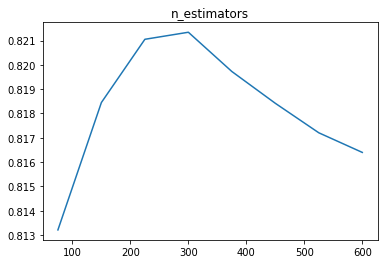

-----------------------------------------------------


In [ ]:
#post_tuning_evaluation(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

# Part 11 : Load imbalanced class with stratified split
- Stratified : means that split ratio is taken equally from all classes ( this makes the FB score a fair metric to use)
- we tried different values of beta (beta = 1: balanced recall vs precision,beta =  .1: precision is more important,beta =  3 :recall is more important)

In [61]:
df_new = pd.read_csv("data.data")
scaler = MinMaxScaler()
print(scaler.fit(df_new.drop('class',axis = 1)))

#print(scaler.data_max_)

new_minimax_data_im = scaler.transform(df_new.drop('class',axis = 1))
new_minimax_data_im = pd.DataFrame(data = new_minimax_data_im, columns=df_new.columns[:-1])
new_minimax_data_im.info()

MinMaxScaler(copy=True, feature_range=(0, 1))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 10 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
dtypes: float64(10)
memory usage: 1.5 MB


In [66]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_minimax_data_im, df_new['class'], test_size=0.3, stratify=df_new['class'])

In [67]:
print (X_train_new.shape, y_train_new.shape)
print (X_test_new.shape, y_test_new.shape)

(13314, 10) (13314,)
(5706, 10) (5706,)


In [112]:
y_train_new.value_counts()


1    8632
0    4682
Name: class, dtype: int64

In [113]:
y_test_new.value_counts()

1    3700
0    2006
Name: class, dtype: int64

In [69]:
y_train_new = y_train_new.apply(tran_mathscore)

y_test_new = y_test_new.apply(tran_mathscore)

In [89]:
beta = 1
pre_tuning_evaluation(X_train_new, y_train_new, X_test_new, y_test_new,beta)

DecisionTreeClassifier trained on 13314 samples.
DecisionTreeClassifier tested on 5706 samples.
Training Accuracy = 1.0
Testing Accuracy = 0.8145811426568524
Fscore Training = 1.0
Fscore Testing = 0.8569110089261563
Precision Testing = 0.8576069301570114
Recall Testing = 0.8562162162162162

AdaBoostClassifier trained on 13314 samples.
AdaBoostClassifier tested on 5706 samples.
Training Accuracy = 0.8445245606128887
Testing Accuracy = 0.8415702769015072
Fscore Training = 0.8840076207553513
Fscore Testing = 0.8815823945506942
Precision Testing = 0.8553634977122522
Recall Testing = 0.9094594594594595

SVC trained on 13314 samples.
SVC tested on 5706 samples.
Training Accuracy = 0.8193630764608683
Testing Accuracy = 0.8203645285664213
Fscore Training = 0.8715209145787702
Fscore Testing = 0.8718589823727965
Precision Testing = 0.8111188648522912
Recall Testing = 0.9424324324324325

RandomForestClassifier trained on 13314 samples.
RandomForestClassifier tested on 5706 samples.
Training Accur

In [90]:
beta = 3
pre_tuning_evaluation(X_train_new, y_train_new, X_test_new, y_test_new,beta)

DecisionTreeClassifier trained on 13314 samples.
DecisionTreeClassifier tested on 5706 samples.
Training Accuracy = 1.0
Testing Accuracy = 0.8145811426568524
Fscore Training = 1.0
Fscore Testing = 0.8563550846083149
Precision Testing = 0.8576069301570114
Recall Testing = 0.8562162162162162

AdaBoostClassifier trained on 13314 samples.
AdaBoostClassifier tested on 5706 samples.
Training Accuracy = 0.8445245606128887
Testing Accuracy = 0.8415702769015072
Fscore Training = 0.9076891210789164
Fscore Testing = 0.9037438899930172
Precision Testing = 0.8553634977122522
Recall Testing = 0.9094594594594595

SVC trained on 13314 samples.
SVC tested on 5706 samples.
Training Accuracy = 0.8193630764608683
Testing Accuracy = 0.8203645285664213
Fscore Training = 0.929307889490174
Fscore Testing = 0.9274182824011277
Precision Testing = 0.8111188648522912
Recall Testing = 0.9424324324324325

RandomForestClassifier trained on 13314 samples.
RandomForestClassifier tested on 5706 samples.
Training Accura

In [71]:
beta = .1
pre_tuning_evaluation(X_train_new, y_train_new, X_test_new, y_test_new,beta)

DecisionTreeClassifier trained on 13314 samples.
DecisionTreeClassifier tested on 5706 samples.
Training Accuracy = 1.0
Testing Accuracy = 0.8145811426568524
Fscore Training = 1.0
Fscore Testing = 0.8575931385687484
Precision Testing = 0.8576069301570114
Recall Testing = 0.8562162162162162

AdaBoostClassifier trained on 13314 samples.
AdaBoostClassifier tested on 5706 samples.
Training Accuracy = 0.8445245606128887
Testing Accuracy = 0.8415702769015072
Fscore Training = 0.8566242881965352
Fscore Testing = 0.8558675396625537
Precision Testing = 0.8553634977122522
Recall Testing = 0.9094594594594595

SVC trained on 13314 samples.
SVC tested on 5706 samples.
Training Accuracy = 0.8193630764608683
Testing Accuracy = 0.8203645285664213
Fscore Training = 0.8098211793200253
Fscore Testing = 0.8122393911439114
Precision Testing = 0.8111188648522912
Recall Testing = 0.9424324324324325

RandomForestClassifier trained on 13314 samples.
RandomForestClassifier tested on 5706 samples.
Training Accur

Unoptimized AdaBoostClassifier
------
Accuracy score on testing data: 0.8416
F-score on testing data: 0.8816

Optimized AdaBoostClassifier
------
Final accuracy score on the testing data: 0.8495
Final F-score on the testing data: 0.8870
Best Parameters : {'n_estimators': 375}


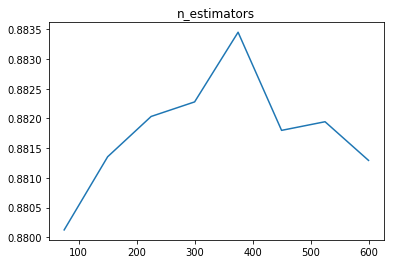

-----------------------------------------------------
Unoptimized SVC
------
Accuracy score on testing data: 0.8204
F-score on testing data: 0.8719

Optimized SVC
------
Final accuracy score on the testing data: 0.8649
Final F-score on the testing data: 0.9019
Best Parameters : {'C': 2000, 'kernel': 'rbf'}


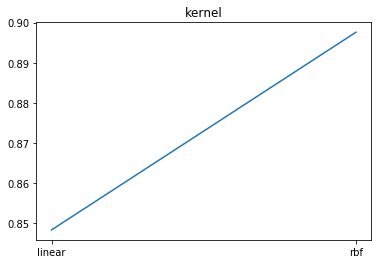

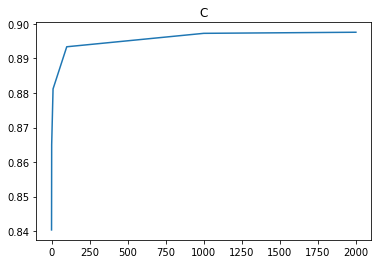

-----------------------------------------------------
Unoptimized RandomForestClassifier
------
Accuracy score on testing data: 0.8710
F-score on testing data: 0.9011

Optimized RandomForestClassifier
------
Final accuracy score on the testing data: 0.8877
Final F-score on the testing data: 0.9161
Best Parameters : {'n_estimators': 375}


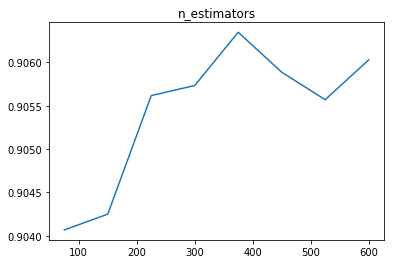

-----------------------------------------------------
Unoptimized KNeighborsClassifier
------
Accuracy score on testing data: 0.8295
F-score on testing data: 0.8757

Optimized KNeighborsClassifier
------
Final accuracy score on the testing data: 0.8340
Final F-score on the testing data: 0.8810
Best Parameters : {'n_neighbors': 15}


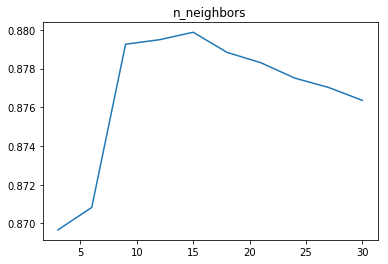

-----------------------------------------------------


In [92]:
beta = 1
best_estimators = post_tuning_evaluation(X_train_new, y_train_new, X_test_new, y_test_new,beta);

In [94]:
beta = 1
best_estimators.append(clf_A)
best_estimators.append(clf_F)
ensemble_voting_evaluation(best_estimators,beta)
best_estimators_new = best_estimators[:len(best_estimators)-3]
best_estimators_new.pop(1)

clf = ensemble_voting_evaluation(best_estimators_new,beta)

Training Accuracy = 0.9147709067606536
Testing Accuracy = 0.855968103663095
Fscore Training = 0.9176470588235294
Fscore Testing = 0.8575653031049778
Training Accuracy = 0.9276941151340382
Testing Accuracy = 0.846249688512335
Fscore Training = 0.9228314145674228
Fscore Testing = 0.8370742012146818


In [102]:
ensemble_voting_evaluation(best_estimators,beta,'soft',[4,5,6,4,1,1]);

Training Accuracy = 0.9349567446331304
Testing Accuracy = 0.8517318714178919
Fscore Training = 0.9378888322284548
Fscore Testing = 0.8574167265756051
